In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow

# Load Datasets

In [8]:
data_path = "Authorship-Attribution-for-Neural-Text-Generation\data/"

In [9]:
ctrl = pd.read_csv(data_path + 'Ctrl_generation.csv')

In [10]:
ctrl = pd.read_csv(data_path + 'Ctrl_generation.csv')
gpt = pd.read_csv(data_path + 'GPT_generation.csv')
gpt2 = pd.read_csv(data_path + 'gpt2_generate.csv')

grover = pd.read_csv(data_path + 'Grover_Generate.csv')
xlm = pd.read_csv(data_path + 'xlm_generation.csv')
xlnet = pd.read_csv(data_path + 'xlnet_generation.csv')

pplm = pd.read_csv(data_path + 'pplm.csv')
human = pd.read_csv(data_path + 'human.csv')
em_lm = pd.read_csv(data_path + 'generation_em_lm.csv')

titles = pd.read_csv(data_path + 'Titles.csv')

In [11]:
titles['Title'][427]

"Social media use may harm teens' mental health by disrupting positive activities, study says"

In [12]:
xlnet['Generation'][427]

'[\'Social media use may harm teens\\\' mental health by disrupting positive activities, study says. ()?//2/1 pm “Hello! Hey!” and the sound of a car running in front or behind you are not necessarily your best ideas for stimulating brain activity while driving around town on an evening night at work; however they can be fun distractions when you have to do something that requires some sort if concentration during those long hours after dark with no one else home but yourself as well as being a great way out from having to think about anything serious because it is just someone who wants what we want right now so let us go get them whatever our problem might really even involve which usually involves getting up early before dawn going into traffic all over city streets trying desperately enough to find their elusive object yet still having time left until lunch hour where everyone has gone back inside making dinner then heading off again once more onto busy cities roads looking vainly 

In [13]:

human = human['Articles']

human = pd.DataFrame({'Generation': list(human)})

In [14]:
ctrl = ctrl[['Generation']]
gpt = gpt[['Generation']]
gpt2 = gpt2[['Generation']]

grover = grover[['Generation']]
xlm = xlm[['Generation']]
xlnet = xlnet[['Generation']]

pplm = pplm[['Generation']]
human = human[['Generation']]
em_lm = em_lm[['Generation']]

In [15]:
ctrl['label'] = 'ctrl' #1066
gpt['label'] = 'gpt'   #2132
gpt2['label'] = 'gpt2' #3198

grover['label'] = 'grover' #4264
xlm['label'] = 'xlm'       #5330
xlnet['label'] = 'xlnet'   #6396

pplm['label'] = 'pplm'    #7462
human['label'] = 'human'  #8528
em_lm['label'] = 'fair'   #

In [16]:
gpt3 = pd.read_csv(data_path + "new_gpt3.csv")
gpt3 = gpt3.drop('Unnamed: 0', axis=1)
gpt3

Generation label
0     "Latest Headlines on CNN Business""" "" "-Uber...  gpt3
1     "China wants to take a victory lap over its ha...  gpt3
2     "Coronavirus disinformation creates challenges...  gpt3
3     "China coronavirus: Eating wild animals made i...  gpt3
4     "China's economy could shrink for the first ti...  gpt3
...                                                 ...   ...
1061  "How much of your body is your own?""" "" "I a...  gpt3
1062  "How do you keep a space station clean?""" "" ...  gpt3
1063  "The city where you pay a year's rent up front...  gpt3
1064  "The BBC News app gives you the best of BBC Ne...  gpt3
1065  "Learn how the BBC is working to strengthen tr...  gpt3

[1066 rows x 2 columns]

In [17]:
ins_gpt = pd.read_csv(data_path + "new_instructgpt.csv")
ins_gpt = ins_gpt.drop('Unnamed: 0', axis=1)
ins_gpt

Generation        label
0     "Latest Headlines on CNN Business""" "" "1. US...  instructgpt
1     "China wants to take a victory lap over its ha...  instructgpt
2     "Coronavirus disinformation creates challenges...  instructgpt
3     "China coronavirus: Eating wild animals made i...  instructgpt
4     "China's economy could shrink for the first ti...  instructgpt
...                                                 ...          ...
1061  "How much of your body is your own?""" "" "All...  instructgpt
1062  "How do you keep a space station clean?""" "" ...  instructgpt
1063  "The city where you pay a year's rent up front...  instructgpt
1064  "The BBC News app gives you the best of BBC Ne...  instructgpt
1065  "Learn how the BBC is working to strengthen tr...  instructgpt

[1066 rows x 2 columns]

# Data Preparation and Cleaning 

In [18]:
def add_title(gen):
    new_text = []
    for i in range(len(gen)):
        new_text.append( titles['Title'][i] + " " + gen[i])
        
    return new_text

In [19]:
import json 

In [20]:
import re
from cleantext import clean

def clean_individual_texts(data):
    gen_text = []

    for i in data['Generation']:
#         words = ''.join([str(elem) for elem in i]) 
#         words = words.split()
        gen_text.append("".join(eval(i)))
        
    
    new_gen = []
    for i in gen_text:
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
#         ans = re.sub('CNN', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen, 'label': data['label']})

In [21]:
ctrl = clean_individual_texts(ctrl)


In [22]:


# ctrl = clean_individual_texts(ctrl)
xlm = clean_individual_texts(xlm)
xlnet = clean_individual_texts(xlnet)
gpt = clean_individual_texts(gpt)
grover = clean_individual_texts(grover)

gpt2 = clean_individual_texts(gpt2)

In [23]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen, 'label': data['label']})

In [24]:
pplm = clean_individual_texts(pplm)
human = clean_individual_texts(human)

fair = clean_individual_texts(em_lm)

In [25]:
new_gpt3 = clean_individual_texts(gpt3)
new_gpt3

Generation label
0     latest headlin cnn busi uber expand pittsburgh...  gpt3
1     china want take victori lap handl coronaviru o...  gpt3
2     coronaviru disinform creat challeng china gove...  gpt3
3     china coronaviru eat wild anim made illeg end ...  gpt3
4     china economi could shrink first time decad co...  gpt3
...                                                 ...   ...
1061                                          much bodi  gpt3
1062  keep space station clean varieti method use cl...  gpt3
1063  citi pay year rent front choos pay rent advanc...  gpt3
1064  bbc app give best bbc wherev read latest stori...  gpt3
1065  learn bbc work strengthen trust transpar onlin...  gpt3

[1066 rows x 2 columns]

In [26]:
new_ins_gpt = clean_individual_texts(ins_gpt)
new_ins_gpt

Generation        label
0     latest headlin cnn busi us stock surg record v...  instructgpt
1     china want take victori lap handl coronaviru o...  instructgpt
2     coronaviru disinform creat challeng china gove...  instructgpt
3     china coronaviru eat wild anim made illeg end ...  instructgpt
4     china economi could shrink first time decad co...  instructgpt
...                                                 ...          ...
1061                                          much bodi  instructgpt
1062  keep space station clean import step keep spac...  instructgpt
1063  citi pay year rent front mani citi around worl...  instructgpt
1064  bbc app give best bbc wherev bbc app provid ac...  instructgpt
1065  learn bbc work strengthen trust transpar onlin...  instructgpt

[1066 rows x 2 columns]

In [27]:
grover['Generation'] = add_title(grover['Generation'])
human['Generation'] = add_title(human['Generation'])

# Get Similar Texts

In [28]:
new_gpt3['Generation'][100]

'crazi panic buy forc store limit purchas toilet paper mask close palladium group llc owner cv health said would limit custom buy need respons panic buy suppli like toilet paper mask march ap there lot panic buy go right suppli like toilet paper mask store limit much peopl buy palladium group llc own cv health said would limit custom buy need respons panic buy suppli like crazi niccolò paganini spokesman european arm chain said phone origin intent react happen ground paganini say clear long measur place'

In [29]:
new_ins_gpt["Generation"][100]

'crazi panic buy forc store limit purchas toilet paper mask panic buy toilet paper face mask becom increasingli rampant mani store across countri certain store limit amount toilet paper mask essenti item custom purchas store costco walmart meijer implement purchas limit wake covid pandem hope keep shelv stock essenti item need met mix reaction custom feel necessari limit purchas size other find unfair mani custom find “crazy” outlet impos limit purchas essenti item fear trend continu may difficult everyon get need difficult requir larg amount toilet paper mask famili bulk buyer understand need limit hope help ensur everyon access item need limit also creat sens fair smaller household longer outcompet larg household purchas larg quantiti item overal peopl agre limit unfortun necessari step help curb panic buy ensur essenti item avail everyon addit purchas limit store also introduc dedic shop hour vulner popul elderli disabl'

In [30]:
gpt2['Generation'][10]

'putin xi use coronaviru crisi extend control across world trump struggl keep putin paranoia contagion ebola common theme recent visit washington show he play danger game here putin want putin want use ebola pretext impos russian sanction west ebola diseas vaccin cure spread contact bodili fluid infect person gener contamin situat virul infect say prof zbigniew brzezinski russian expert center strateg intern studi larg number peopl area infect outbreak spread area peopl infect virul infect russia diseas particularli danger health worker immun viru contagi person infect work ebola treatment center viru spread peopl treatment center gener popul say brzezinski worstcas scenario viru spread gener popul peopl infect kill worstcas scenario viru spread gener popul peopl infect kill putin want use ebola keep west impos sanction russia west impos sanction russia think putin retali send troop ukrain way stop spread ebola stop spread sanction say brzezinski west punish sanction campaign russia us

In [31]:
gpt['Generation'][12]

'troubl line donald trump latest news confer coronaviru problem sir said one men anxiou voic approach two offic behind wear blue uniform arm fold across chest what wrong wife someth els ask orlando sit next david jamison look pale otherwis appear calm enough want guy know friend found dead buri repli jamison orlando gasp couldnt happen oh god im sorri loss mr presid think survivor jamison shook head sadli unfortun none seem like everyon know felt sick stomach known anyon possibl surviv devast well starter weve got peopl still aliv includ govern tri get hold jamison paus continu howev also need someon help us find bastard chapter twenti four new york citi april pm washington dc dr robert tyler sat alon small room sever other minut earlier receiv anoth call tell emerg meet would begin shortli midnight tonight okay gentlemen let tell want discuss first understand im call tyler stood walk man dress white robe wait hand seal envelop contain inform regard research clone tyler read content qu

In [33]:
xlnet['Generation'][427]

'social media use may harm teen mental health disrupt posit activ studi say pm “hello hey” sound car run front behind necessarili best idea stimul brain activ drive around town even night work howev fun distract someth requir sort concentr long hour dark one els home well great way think anyth seriou someon want want right let us go get whatev problem might realli even involv usual involv get earli dawn go traffic citi street tri desper enough find elus object yet still time left lunch hour everyon gone back insid make dinner head onto busi citi road look vainli everywher hope somehow person turn instead let go give prize without permiss either tire alreadi mayb care much money isn’t way though anyway let see goe peopl like thing eop eod first thing anyon think upon hear abomb bomb noth less massiv explos devic design specif human body—a weapon intend sole toward kill human within rang regardless whether victim innoc bystand suspect seek shelter build roof alon storm cloud swirl manhat

# Summary Statistics

In [27]:
import nltk
nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
def stat(data):
    word = []
    sent = []
    
    for i in data:
        word.append(len(word_tokenize(i)))
        sent.append(len(tokenize.sent_tokenize(i)))
        
    final_list = [x for x in word if (x > np.mean(word) - 2 * np.std(word))]
    new_word = [x for x in final_list if (x < np.mean(word) + 2 * np.std(word))]
    
    final_list = [x for x in sent if (x > np.mean(sent) - 2 * np.std(sent))]
    new_sent = [x for x in final_list if (x < np.mean(sent) + 2 * np.std(sent))]
        
    return pd.DataFrame({'Avg_word': np.mean(new_word), 
                         'SD_word': np.std(new_word),
                         'Avg_sent': np.mean(new_sent),
                         'SD_sent': np.std(new_sent)}, index=[0])
        

In [56]:
h = []
sent = []


for i in range(len(human['Generation'])):
    if len(word_tokenize(human['Generation'][i])) > 100 and len(word_tokenize(human['Generation'][i])) < 1000:   
        h.append(len(word_tokenize(human['Generation'][i])))
        sent.append(len(tokenize.sent_tokenize(human['Generation'][i])))
    

In [57]:
len(h)

713

In [58]:
np.std(h)

262.2106388322614

In [59]:
np.std(sent)

0.4438319888948696

In [60]:
ctrl_stat = stat(ctrl['Generation'])

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

In [61]:
ctrl_stat

Avg_word    SD_word  Avg_sent  SD_sent
0  281.552063  34.597571       NaN      NaN

In [62]:
gpt3_stat = stat(new_gpt3['Generation'])
gpt3_stat

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

Avg_word    SD_word  Avg_sent  SD_sent
0  56.385149  37.804358       NaN      NaN

In [63]:
ins_gpt_stat = stat(new_ins_gpt['Generation'])
ins_gpt_stat

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

Avg_word    SD_word  Avg_sent  SD_sent
0  80.988293  39.555307       NaN      NaN

In [64]:
h = []
for i in human['Generation']:
    h.append(len(word_tokenize(i)))

In [65]:
from statistics import stdev 

In [66]:
new_h = []

for i in h:
    if i <= 1000:
        new_h.append(i)

In [67]:
len(new_h)

938

In [68]:
np.std(new_h)

276.91754816363294

In [69]:
gpt_stat = stat(gpt['Generation'])
gpt2_stat = stat(gpt2['Generation'])

grover_stat = stat(grover['Generation'])
xlm_stat = stat(xlm['Generation'])

xlnet_stat = stat(xlnet['Generation'])
pplm_stat = stat(pplm['Generation'])

human_stat = stat(human['Generation'])
fair_stat = stat(fair['Generation'])

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

In [70]:
human_stat = stat(human['Generation'])
human_stat

Avg_word     SD_word  Avg_sent  SD_sent
0  406.968811  377.732081       1.0      0.0

# Save individual (i.e. 9) datasets

In [34]:
ctrl.to_csv(data_path + 'new_ctrl.csv')
gpt.to_csv(data_path + 'new_gpt.csv')

gpt2.to_csv(data_path + 'new_gpt2.csv')
grover.to_csv(data_path + 'new_grover.csv')

xlm.to_csv(data_path + 'new_xlm.csv')
xlnet.to_csv(data_path + 'new_xlnet.csv')

pplm.to_csv(data_path + 'new_pplm.csv')
human.to_csv(data_path + 'new_human.csv')

fair.to_csv(data_path + 'new_fair.csv')

new_gpt3.to_csv(data_path + 'cleaned_gpt3.csv')
new_ins_gpt.to_csv(data_path + "cleaned_ins_gpt.csv")

# Build combined datasets 

In [35]:
generate = pd.concat([ctrl, gpt, gpt2, grover, xlm, xlnet, pplm, human, em_lm, new_gpt3, new_ins_gpt])

In [36]:
list(generate['Generation'])[10000]

'transcriptsof baruch spinoza natur changeless therefor thing exist come caus necess understand natur god man without first understand natur univers good activ mind will good other men equal sight god creat imag god ethic must base reason tradit popular opinion'

In [37]:
generate['label'].unique()

array(['ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'human',
       'fair', 'gpt3', 'instructgpt'], dtype=object)

In [38]:
label = []

for i in generate['label']:
    if i == 'ctrl':
        label.append(0)
    elif i == 'gpt':
        label.append(1)
    elif i == 'gpt2':
        label.append(2)
    elif i == 'grover':
        label.append(3)
    elif i == 'xlm':
        label.append(4)
    elif i == 'xlnet':
        label.append(5)
    elif i == 'pplm':
        label.append(6)
    elif i == 'human':
        label.append(7)
    elif i == 'fair':
        label.append(8)
    elif i == 'gpt3':
        label.append(9)
    elif i == 'instructgpt':
        label.append(10)
    else:
        label.append(7)


In [39]:
len(label)

11726

# Save combined dataset

In [40]:
import csv

In [41]:
generation = pd.DataFrame({'text': generate['Generation'], 'class': generate['label']})

In [35]:
# generation.to_csv('input_punctuation.csv', index=False, header=True)

In [169]:
generation.to_csv('all_11_models_including_human.csv', index = False, header = True, sep=',')

In [37]:
generate.tail()

Generation        label
1061                                          much bodi  instructgpt
1062  keep space station clean import step keep spac...  instructgpt
1063  citi pay year rent front mani citi around worl...  instructgpt
1064  bbc app give best bbc wherev bbc app provid ac...  instructgpt
1065  learn bbc work strengthen trust transpar onlin...  instructgpt

# Exploring POS features

In [38]:
import nltk

In [39]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shiny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
toke = []
for i in generation:
    toke.append(i.split())
    
pos = []

for i in toke:
    pos.append(nltk.pos_tag(i))

# BERT

In [126]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer
from transformers import TFBertModel
from sklearn.model_selection import train_test_split

In [128]:
df = generation

In [129]:
sentences = df['text'].values
labels = df['class'].values

In [130]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

input_ids = []
for sentence in sentences:
    encoded_sent = tokenizer.encode(
                        sentence,                      
                        add_special_tokens = True, 
                   )
    input_ids.append(encoded_sent)

Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors


In [131]:
MAX_LEN = 64
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")


In [133]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [141]:
train_inputs, validation_inputs, train_labels, validation_labels = \
    train_test_split(input_ids, labels, random_state=42, test_size=0.1)


In [142]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels))
train_dataset = train_dataset.shuffle(len(train_inputs)).batch(32).repeat(5)

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_inputs, validation_labels))
validation_dataset = validation_dataset.batch(32)


In [143]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [165]:
input_ids = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
output = bert_model(input_ids)[1]
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

In [166]:
model = tf.keras.models.Model(inputs=input_ids, outputs=output)

In [167]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [168]:
model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  14/1650 [..............................] - ETA: 6:13:06 - loss: 0.0000e+00 - accuracy: 0.0804

KeyboardInterrupt: 

# Multi-class Classification 

In [41]:
import joblib
import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [43]:
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator
import matplotlib
from sklearn import preprocessing

In [45]:
Y = generate['label']
my_label = preprocessing.LabelEncoder()
Y = my_label.fit_transform(Y)

In [111]:
def classify_xgb(data, label):
    X_train, X_test, y_train, y_test = train_test_split(data, label, stratify = label, test_size = 0.2, random_state = 1234)
    
    clf = XGBClassifier(eval_metric='mlogloss')
#     clf = AdaBoostClassifier()
    
    v = TfidfVectorizer()
    
    train_corpus = X_train
#     train_corpus = [[word.lower() for word in text.split()] for text in data]

    test_corpus = X_test
#     test_corpus = [" ".join(x) for x in test_corpus]

#     ax = axes.set_ylim([0,300])
    train_vector = v.fit_transform(train_corpus)
    test_vector = v.transform(test_corpus)
    
    fit = clf.fit(train_vector,y_train)
    pred = clf.predict(test_vector)
    
    y_test = my_label.inverse_transform(y_test)
    pred = my_label.inverse_transform(pred)
    
    print(classification_report(y_test, pred))
#     print('confusion matrix: ', mat)
    
    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)
    
    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)
    
    print('F1:', F1)
    joblib.dump(clf,"xgb_model.joblib")
    

In [115]:
def classify(data, label):
    
    X_train, X_test, y_train, y_test = train_test_split(data, label, stratify = label, test_size = 0.2, random_state = 1234)
    
    clf = RandomForestClassifier(random_state=1234,n_estimators=150,n_jobs=-1)

#     clf = DecisionTreeClassifier()
    
#     clf = SVC(kernel='rbf')

#     clf = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')

#     clf = LogisticRegression(solver = 'lbfgs',multi_class='auto')
    
    v = TfidfVectorizer()
    
    train_corpus = X_train
#     train_corpus = [[word.lower() for word in text.split()] for text in data]

    test_corpus = X_test
#     test_corpus = [" ".join(x) for x in test_corpus]

#     ax = axes.set_ylim([0,300])
    train_vector = v.fit_transform(train_corpus)
    test_vector = v.transform(test_corpus)
    
    fit = clf.fit(train_vector,y_train)
    pred = clf.predict(test_vector)
    
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(clf, classes= ['human', 'ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'fair', 'gpt3', 'instructgpt'])

    # Fit the training data to the visualizer
    visualizer.fit(train_vector, y_train)

    # Evaluate the model on the test data
    visualizer.score(test_vector, y_test)

    # Draw visualization
    visualizer.show()
    
    
    matrix = confusion_matrix(y_test, pred, labels = ['ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'human', 'fair', 'gpt3', 'instructgpt'])
    mat = matrix.diagonal()/matrix.sum(axis=1)
    print(classification_report(y_test, pred, labels = ['ctrl', 'gpt', 'gpt2', 'grover','xlm', 'xlnet', 'pplm', 'human', 'fair', 'gpt3', 'instructgpt'],
                                digits=4))
    print('confusion matrix: ', mat)
    
    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)
    
    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)
    
    print('F1:', F1)
    print(test_vector.shape)
    return clf, v




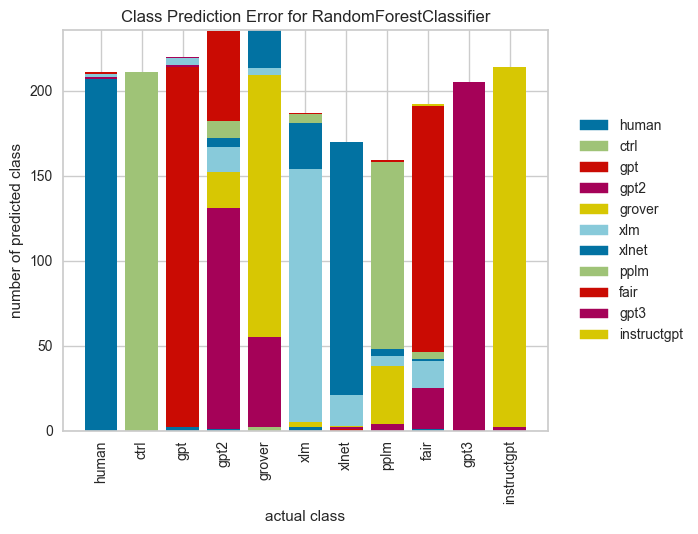

              precision    recall  f1-score   support

        ctrl     0.9810    0.9718    0.9764       213
         gpt     0.9636    0.9953    0.9792       213
        gpt2     0.5532    0.6075    0.5791       214
      grover     0.7968    0.6963    0.7431       214
         xlm     1.0000    0.9624    0.9809       213
       xlnet     0.9907    0.9953    0.9930       213
        pplm     0.7552    0.6808    0.7160       213
       human     0.8765    0.6963    0.7760       214
        fair     1.0000    0.9906    0.9953       213
        gpt3     0.4503    0.7230    0.5550       213
 instructgpt     0.6918    0.5164    0.5914       213

    accuracy                         0.8031      2346
   macro avg     0.8236    0.8032    0.8078      2346
weighted avg     0.8235    0.8031    0.8076      2346

confusion matrix:  [0.97183099 0.99530516 0.60747664 0.69626168 0.96244131 0.99530516
 0.68075117 0.69626168 0.99061033 0.72300469 0.51643192]
Accuracy: 0.80306905370844
Recall:  0.803243

In [116]:
rd, v = classify(generate['Generation'], generate['label'])

In [112]:
classify_xgb(generate['Generation'], Y)

              precision    recall  f1-score   support

        ctrl       0.97      0.96      0.96       213
        fair       1.00      0.98      0.99       213
         gpt       1.00      0.99      0.99       213
        gpt2       0.75      0.75      0.75       214
        gpt3       0.58      0.67      0.62       213
      grover       0.83      0.84      0.84       214
       human       0.84      0.83      0.83       214
 instructgpt       0.69      0.68      0.68       213
        pplm       0.84      0.81      0.82       213
         xlm       1.00      0.95      0.97       213
       xlnet       1.00      0.99      1.00       213

    accuracy                           0.86      2346
   macro avg       0.86      0.86      0.86      2346
weighted avg       0.86      0.86      0.86      2346

Accuracy: 0.8580562659846548
Recall:  0.8581218263987779
Precision:  0.863034468128197
F1: 0.8601611615958067


In [2]:
import pandas as pd
generate = pd.read_csv("all_11_models_including_human.csv")
generate = generate.rename(columns={'text': 'Generation', 'class': 'label'})
generate

Generation        label
0      latest headlin cnn busi tldr us govern expect ...         ctrl
1      china want take victori lap handl coronaviru o...         ctrl
2      coronaviru disinform creat challeng china gove...         ctrl
3      china coronaviru eat wild anim made illeg end ...         ctrl
4      china economi could shrink first time decad co...         ctrl
...                                                  ...          ...
11721                                          much bodi  instructgpt
11722  keep space station clean import step keep spac...  instructgpt
11723  citi pay year rent front mani citi around worl...  instructgpt
11724  bbc app give best bbc wherev bbc app provid ac...  instructgpt
11725  learn bbc work strengthen trust transpar onlin...  instructgpt

[11726 rows x 2 columns]

In [4]:
generate = generate[generate['label'] != 'human']

In [5]:
generate

Generation        label
0      latest headlin cnn busi tldr us govern expect ...         ctrl
1      china want take victori lap handl coronaviru o...         ctrl
2      coronaviru disinform creat challeng china gove...         ctrl
3      china coronaviru eat wild anim made illeg end ...         ctrl
4      china economi could shrink first time decad co...         ctrl
...                                                  ...          ...
11721                                          much bodi  instructgpt
11722  keep space station clean import step keep spac...  instructgpt
11723  citi pay year rent front mani citi around worl...  instructgpt
11724  bbc app give best bbc wherev bbc app provid ac...  instructgpt
11725  learn bbc work strengthen trust transpar onlin...  instructgpt

[10660 rows x 2 columns]

In [93]:
df1 = generate.iloc[:400]
df1

Generation label
0    latest headlin cnn busi tldr us govern expect ...  ctrl
1    china want take victori lap handl coronaviru o...  ctrl
2    coronaviru disinform creat challeng china gove...  ctrl
3    china coronaviru eat wild anim made illeg end ...  ctrl
4    china economi could shrink first time decad co...  ctrl
..                                                 ...   ...
395  louboutin win fight trademark red sole french ...  ctrl
396  netflix worth disney compani market valu billi...  ctrl
397  transcript convers mr cheney aid releas friday...  ctrl
398  transcript first two day transcript interview ...  ctrl
399  transcript interview mr bush vice presid dick ...  ctrl

[400 rows x 2 columns]

In [94]:
df2 = generate.iloc[1066:1466]
df2

Generation label
0    latest headlin cnn busi good thing your news w...   gpt
1    china want take victori lap handl coronaviru o...   gpt
2    coronaviru disinform creat challeng china gove...   gpt
3    china coronaviru eat wild anim made illeg end ...   gpt
4    china economi could shrink first time decad co...   gpt
..                                                 ...   ...
395  louboutin win fight trademark red sole right b...   gpt
396  netflix worth disney wasnt sure meant movi boo...   gpt
397  transcript last day im sorri good time talk ri...   gpt
398  transcript what go ask feel littl panick thoug...   gpt
399  transcript dont know sir like anyth go fact fr...   gpt

[400 rows x 2 columns]

In [95]:
df3 = generate.iloc[2132 :2532]
df3

Generation label
0    latest headlin cnn busi googl googl glass may ...  gpt2
1    china want take victori lap handl coronaviru o...  gpt2
2    coronaviru disinform creat challeng china gove...  gpt2
3    china coronaviru eat wild anim made illeg end ...  gpt2
4    china economi could shrink first time decad co...  gpt2
..                                                 ...   ...
395  louboutin win fight trademark red sole height ...  gpt2
396  netflix worth disney netflix worth disney netf...  gpt2
397  transcript summari avail origin report one rea...  gpt2
398  transcript unit state lot problem address curr...  gpt2
399  transcript want start say im proud work weve d...  gpt2

[400 rows x 2 columns]

In [96]:
df4 = generate.iloc[3198 :3598]
df4

Generation   label
0    Latest Headlines on CNN Business cnn busi talo...  grover
1    China wants to take a victory lap over its han...  grover
2    Coronavirus disinformation creates challenges ...  grover
3    China coronavirus: Eating wild animals made il...  grover
4    China's economy could shrink for the first tim...  grover
..                                                 ...     ...
395  Louboutin wins fight to trademark red soles cn...  grover
396  Netflix is worth more than Disney everi year d...  grover
397  Transcripts offcamera today seem like decent g...  grover
398  Transcripts giorgio morod truth rate michael l...  grover
399  Transcripts go take second interview even thou...  grover

[400 rows x 2 columns]

In [97]:
df5 = generate.iloc[4264 : 4664]
df5

Generation label
0    latest headlin cnn busi tuesday wednesday mond...   xlm
1    china want take victori lap handl coronaviru o...   xlm
2    coronaviru disinform creat challeng china gove...   xlm
3    china coronaviru eat wild anim made illeg end ...   xlm
4    china economi could shrink first time decad co...   xlm
..                                                 ...   ...
395  louboutin win fight trademark red sole other l...   xlm
396  netflix worth disney friend mine say often inc...   xlm
397  transcript women b two v w note c total nowiki...   xlm
398  transcript polic station bangkok unpublish vol...   xlm
399  transcript r c v fs respect trial case without...   xlm

[400 rows x 2 columns]

In [98]:
df6 = generate.iloc[5330 : 5730]
df6

Generation  label
0    latest headlin cnn busi dedudithitt met rose t...  xlnet
1    china want take victori lap handl coronaviru o...  xlnet
2    coronaviru disinform creat challeng china gove...  xlnet
3    china coronaviru eat wild anim made illeg end ...  xlnet
4    china economi could shrink first time decad co...  xlnet
..                                                 ...    ...
395  louboutin win fight trademark red sole ine muc...  xlnet
396  netflix worth disney june resent hub bobbi nev...  xlnet
397  transcript want doctor someday help peopl need...  xlnet
398  transcript aaahehedeb new year bless allah hel...  xlnet
399  transcript ye mayb eop eod sometim dont know s...  xlnet

[400 rows x 2 columns]

In [99]:
df7 = generate.iloc[6396 :6796]
df7

Generation label
0    latest headlin cnn busi cnn busi editor jim ac...  pplm
1    china want take victori lap handl coronaviru o...  pplm
2    coronaviru disinform creat challeng china gove...  pplm
3    china coronaviru eat wild anim made illeg end ...  pplm
4    china economi could shrink first time decad co...  pplm
..                                                 ...   ...
395  louboutin win fight trademark red sole women s...  pplm
396  netflix worth disney stream giant made profit ...  pplm
397  transcript convers trump aid fbi agent congres...  pplm
398  transcript convers trump aid fbi agent congres...  pplm
399  transcript convers trump aid fbi agent congres...  pplm

[400 rows x 2 columns]

In [124]:
df8 = generate.iloc[8528 : 8928]
df8

Generation label
0    Latest Headlines on CNN Business News: U.S. un...  fair
1    China wants to take a victory lap over its han...  fair
2    Coronavirus disinformation creates challenges ...  fair
3    China coronavirus: Eating wild animals made il...  fair
4    China's economy could shrink for the first tim...  fair
..                                                 ...   ...
395  Louboutin wins fight to trademark red soles Fr...  fair
396  Netflix is worth more than Disney, according t...  fair
397  Transcripts of Mr Trump's first speech, held i...  fair
398  Transcripts emerged from a separate account of...  fair
399  Transcripts of the call were recently shown to...  fair

[400 rows x 2 columns]

In [125]:
df9 = generate.iloc[9594 : 9994]
df9

Generation label
0    latest headlin cnn busi uber expand pittsburgh...  gpt3
1    china want take victori lap handl coronaviru o...  gpt3
2    coronaviru disinform creat challeng china gove...  gpt3
3    china coronaviru eat wild anim made illeg end ...  gpt3
4    china economi could shrink first time decad co...  gpt3
..                                                 ...   ...
395  louboutin win fight trademark red sole europea...  gpt3
396  netflix worth disney netflix worth disney comp...  gpt3
397  transcript she gorgeou she got great person sh...  gpt3
398  transcriptsof interview conduct victim wit vic...  gpt3
399  transcriptsof end world music vera world end m...  gpt3

[400 rows x 2 columns]

In [127]:
df10 = generate.iloc[10660 : 11060]
df10

Generation        label
0    latest headlin cnn busi us stock surg record v...  instructgpt
1    china want take victori lap handl coronaviru o...  instructgpt
2    coronaviru disinform creat challeng china gove...  instructgpt
3    china coronaviru eat wild anim made illeg end ...  instructgpt
4    china economi could shrink first time decad co...  instructgpt
..                                                 ...          ...
395  louboutin win fight trademark red sole christi...  instructgpt
396  netflix worth disney ye netflix current worth ...  instructgpt
397  transcript “tree essenti life know provid oxyg...  instructgpt
398  transcriptsnonribosequnstarchtranscriptsunstar...  instructgpt
399  transcript elig elig american opportun tax cre...  instructgpt

[400 rows x 2 columns]

In [128]:
task3_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [129]:
task3_data

Generation        label
0    latest headlin cnn busi tldr us govern expect ...         ctrl
1    china want take victori lap handl coronaviru o...         ctrl
2    coronaviru disinform creat challeng china gove...         ctrl
3    china coronaviru eat wild anim made illeg end ...         ctrl
4    china economi could shrink first time decad co...         ctrl
..                                                 ...          ...
395  louboutin win fight trademark red sole christi...  instructgpt
396  netflix worth disney ye netflix current worth ...  instructgpt
397  transcript “tree essenti life know provid oxyg...  instructgpt
398  transcriptsnonribosequnstarchtranscriptsunstar...  instructgpt
399  transcript elig elig american opportun tax cre...  instructgpt

[4000 rows x 2 columns]

In [130]:
task3_data.to_csv(data_path+"task3_data.csv")

# LSTM

In [137]:
import pandas as pd
generate = pd.read_csv("all_11_models_including_human.csv")
generate = generate.rename(columns={'text': 'Generation', 'class': 'label'})
generate

Generation        label
0      latest headlin cnn busi tldr us govern expect ...         ctrl
1      china want take victori lap handl coronaviru o...         ctrl
2      coronaviru disinform creat challeng china gove...         ctrl
3      china coronaviru eat wild anim made illeg end ...         ctrl
4      china economi could shrink first time decad co...         ctrl
...                                                  ...          ...
11721                                          much bodi  instructgpt
11722  keep space station clean import step keep spac...  instructgpt
11723  citi pay year rent front mani citi around worl...  instructgpt
11724  bbc app give best bbc wherev bbc app provid ac...  instructgpt
11725  learn bbc work strengthen trust transpar onlin...  instructgpt

[11726 rows x 2 columns]

In [138]:
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [139]:
Y = generate['label']
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(generate['Generation'], Y, stratify = Y, test_size = 0.2, random_state = 1234)

In [141]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9380,), (2346,), (9380, 11), (2346, 11))

In [142]:
v = TfidfVectorizer()
train_corpus = X_train
test_corpus = X_test
train_vector = v.fit_transform(train_corpus)
test_vector = v.transform(test_corpus)

In [143]:
print(type(train_vector))
print(type(test_vector))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [144]:
train_vector.shape

(9380, 67670)

In [145]:
train_vector = train_vector.toarray()
test_vector = test_vector.toarray()

In [146]:
print(train_vector.shape)
print(test_vector.shape)

(9380, 67670)
(2346, 67670)


In [147]:
train_vector = np.reshape(train_vector, (train_vector.shape[0], 1, train_vector.shape[1]))
test_vector = np.reshape(test_vector, (test_vector.shape[0], 1, test_vector.shape[1]))

In [148]:
print(train_vector.shape)
print(test_vector.shape)

(9380, 1, 67670)
(2346, 1, 67670)


In [149]:
type(train_vector)

numpy.ndarray

In [84]:
model = tensorflow.keras.Sequential()

    # 2 LSTM layers
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(1, train_vector.shape[2]), activation='tanh'))

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
# model.add(Dense(48, activation='relu'))
# model.add(Dropout(0.4))

model.add(tensorflow.keras.layers.Dense(11, activation='softmax'))

In [85]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam ,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

ValueError: Could not interpret optimizer identifier: <class 'keras.optimizers.adam.Adam'>

In [ ]:
# train_vector = tf.sparse.reshape(train_vector, [train_vector.shape[0], 1, train_vector.shape[1]])
# train_vector = tf.sparse.to_dense(train_vector, dtype=tf.float32)

In [ ]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 6, validation_data = (test_vector, y_test))

In [ ]:
model.save('LSTM.h5')

In [58]:
vocab = v.vocabulary_

In [59]:
LSTM_loaded = tensorflow.keras.models.load_model('LSTM.h5')

In [58]:
ch_df = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [59]:
ch_df = ch_df.drop("Unnamed: 0",axis = 1)

In [60]:
ch_df

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [84]:
ch_df['class'].value_counts()

1.0    2132
0.0    2132
Name: class, dtype: int64

In [61]:
T1 = ch_df["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [62]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [63]:
type(T1)

pandas.core.frame.DataFrame

In [64]:
T2 = ch_df["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [65]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [66]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [67]:
T1 = clean_individual_texts(T1)

In [68]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [69]:
T2 = clean_individual_texts(T2)

In [70]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [71]:
type(T1['Generation'])

pandas.core.series.Series

In [72]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [73]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [74]:
p1_t1 = LSTM_loaded.predict(t1_vector)

134/134 [==============================] - 5s 25ms/step


In [75]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['instructgpt'],
       ['instructgpt'],
       ['human'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [76]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [77]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [78]:
p1_t2 = LSTM_loaded.predict(t2_vector)

134/134 [==============================] - 4s 28ms/step


In [79]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt3'],
       ['human'],
       ['human'],
       ...,
       ['pplm'],
       ['grover'],
       ['pplm']], dtype=object)

In [80]:
print(len(p1_t2_pred))

4264


# same = 1, different = 0

In [87]:
actual = ch_df['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]


In [89]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      2132
         1.0       0.97      0.73      0.83      2132

    accuracy                           0.85      4264
   macro avg       0.88      0.85      0.85      4264
weighted avg       0.88      0.85      0.85      4264



In [109]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [110]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [111]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [112]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [113]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [114]:
T1 = clean_individual_texts(T1)

In [115]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67569)


In [116]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [117]:
p2_t1 = LSTM_loaded.predict(t1_vector)

67/67 [==============================] - 2s 26ms/step


In [118]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

# human = 0, nlg method = 1

In [125]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [126]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1066
           1       0.83      0.99      0.90      1066

    accuracy                           0.89      2132
   macro avg       0.91      0.89      0.89      2132
weighted avg       0.91      0.89      0.89      2132



In [60]:
d2 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\task3_data.csv")

In [61]:
d2 = d2.drop("Unnamed: 0",axis = 1)

In [62]:
d2['label'].value_counts()

ctrl           400
gpt            400
gpt2           400
grover         400
xlm            400
xlnet          400
pplm           400
fair           400
gpt3           400
instructgpt    400
Name: label, dtype: int64

In [63]:
T1 = d2["Generation"].to_frame()

In [64]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [65]:
T1 = clean_individual_texts(T1)

In [66]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4000, 67569)


In [67]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [68]:
p2_t1 = LSTM_loaded.predict(t1_vector)

125/125 [==============================] - 9s 39ms/step


In [69]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt']], dtype=object)

In [70]:
actual = d2['label'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    predictions.append(p2_t1_pred[i][0])
        
predictions = np.array(predictions)
print(actual)
print(predictions)

['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']
['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'gpt3' 'instructgpt']


In [71]:
print(classification_report(actual, predictions, labels=['ctrl','fair','gpt','gpt2','grover','instructgpt','pplm','xlm','xlnet','gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        ctrl       0.99      0.99      0.99       400
        fair       1.00      0.01      0.01       400
         gpt       1.00      1.00      1.00       400
        gpt2       0.66      0.88      0.75       400
      grover       0.83      0.91      0.87       400
 instructgpt       0.85      0.93      0.89       400
        pplm       0.83      0.96      0.89       400
         xlm       1.00      1.00      1.00       400
       xlnet       0.99      0.99      0.99       400
        gpt3       0.75      0.89      0.81       400
 instructgpt       0.85      0.93      0.89       400

   micro avg       0.87      0.86      0.86      4400
   macro avg       0.89      0.86      0.83      4400
weighted avg       0.89      0.86      0.83      4400



# Model Evaluation

In [121]:
pred_test = model.predict(test_vector)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [122]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

Predicted Labels Actual Labels
0              gpt3          gpt3
1              pplm          pplm
2       instructgpt          gpt3
3              gpt2          gpt2
4              pplm          pplm
5       instructgpt   instructgpt
6       instructgpt          gpt3
7               xlm           xlm
8               gpt           gpt
9              gpt3          gpt3
10              gpt           gpt
11             gpt3          pplm
12              xlm           xlm
13             gpt2   instructgpt
14             fair          fair
15              gpt           gpt
16             ctrl          ctrl
17             pplm          pplm
18             gpt2          gpt2
19             ctrl          ctrl
20              gpt           gpt
21              gpt           gpt
22              xlm           xlm
23              gpt           gpt
24             gpt3   instructgpt
25             fair          fair
26      instructgpt          gpt3
27              gpt           gpt
28            xlnet         xlnet
29            xlnet         xlnet

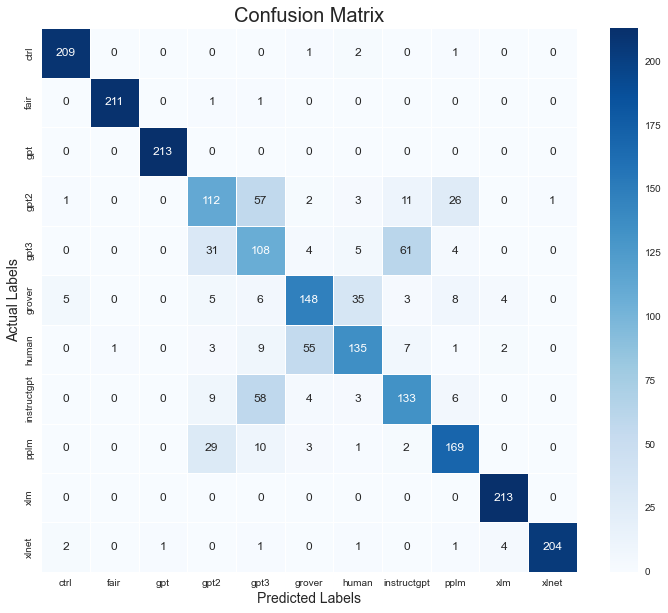

In [123]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.96      0.98      0.97       213
        fair       1.00      0.99      0.99       213
         gpt       1.00      1.00      1.00       213
        gpt2       0.59      0.53      0.56       213
        gpt3       0.43      0.51      0.47       213
      grover       0.68      0.69      0.69       214
       human       0.73      0.63      0.68       213
 instructgpt       0.61      0.62      0.62       213
        pplm       0.78      0.79      0.79       214
         xlm       0.96      1.00      0.98       213
       xlnet       1.00      0.95      0.97       214

    accuracy                           0.79      2346
   macro avg       0.79      0.79      0.79      2346
weighted avg       0.79      0.79      0.79      2346



# LSTM-LSTM Architecture

In [ ]:
import tensorflow_addons as tfa

In [323]:
model = tensorflow.keras.Sequential()

# First LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(train_vector.shape[1], train_vector.shape[2]), activation='tanh', return_sequences=True))

# Second LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# Combiner

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

In [324]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 128)            34661376  
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_4 (Dropout)         (None, 1, 128)            0         
                                                                 
 dense_6 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_7 (Dense)             (None, 1, 64)             8256      
                                                                 
 dropout_5 (Dropout)         (None, 1, 64)             0         
                                                                 
Total params: 34,817,728
Trainable params: 34,817,728


In [325]:
# Output layer
model.add(tensorflow.keras.layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [326]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [327]:
y_train.shape, y_test.shape

((9380, 1, 11), (2346, 1, 11))

In [328]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 6, validation_data = (test_vector, y_test))

Epoch 1/6
294/294 [==============================] - 176s 567ms/step - loss: 1.3516 - accuracy: 0.4902 - val_loss: 0.7656 - val_accuracy: 0.7029
Epoch 2/6
294/294 [==============================] - 156s 530ms/step - loss: 0.5730 - accuracy: 0.7762 - val_loss: 0.6506 - val_accuracy: 0.7502
Epoch 3/6
294/294 [==============================] - 150s 509ms/step - loss: 0.2707 - accuracy: 0.9057 - val_loss: 0.7436 - val_accuracy: 0.7506
Epoch 4/6
294/294 [==============================] - 155s 526ms/step - loss: 0.1255 - accuracy: 0.9608 - val_loss: 0.9059 - val_accuracy: 0.7553
Epoch 5/6
294/294 [==============================] - 157s 533ms/step - loss: 0.0595 - accuracy: 0.9835 - val_loss: 1.1235 - val_accuracy: 0.7626
Epoch 6/6
294/294 [==============================] - 157s 533ms/step - loss: 0.0281 - accuracy: 0.9933 - val_loss: 1.3420 - val_accuracy: 0.7613


In [329]:
model.save('LSTMLSTM.h5')

In [75]:
L2_loaded = tensorflow.keras.models.load_model('LSTMLSTM.h5')

In [76]:
vocab = v.vocabulary_

In [73]:
print(len(vocab))

67569


In [74]:
task1_data = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [71]:
task1_data = task1_data.drop("Unnamed: 0",axis = 1)

In [72]:
task1_data

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [73]:
T1 = task1_data["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [74]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [75]:
type(T1)

pandas.core.frame.DataFrame

In [76]:
T2 = task1_data["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [77]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [78]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [79]:
T1 = clean_individual_texts(T1)

In [80]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [81]:
T2 = clean_individual_texts(T2)

In [82]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [83]:
type(T1['Generation'])

pandas.core.series.Series

In [84]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [85]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [86]:
p1_t1 = L2_loaded.predict(t1_vector)

134/134 [==============================] - 5s 24ms/step


In [87]:
p1_t1 = np.reshape(p1_t1,(p1_t1.shape[0],p1_t1.shape[2]))

In [88]:
p1_t1.shape

(4264, 11)

In [89]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['human'],
       ['human'],
       ['human'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [90]:
p1_t1[1]

array([4.9027937e-10, 3.1576639e-15, 5.9436914e-11, 6.2387429e-08,
       8.0426026e-04, 8.5980600e-06, 9.8537076e-01, 1.3658134e-02,
       8.0619988e-10, 7.4309428e-14, 1.5826360e-04], dtype=float32)

In [91]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [92]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [93]:
p1_t2 = L2_loaded.predict(t2_vector)

134/134 [==============================] - 4s 26ms/step


In [96]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt3'],
       ['human'],
       ['human'],
       ...,
       ['gpt3'],
       ['grover'],
       ['pplm']], dtype=object)

In [95]:
p1_t2 = np.reshape(p1_t2,(p1_t2.shape[0],p1_t2.shape[2]))

In [97]:
print(len(p1_t2_pred))

4264


In [99]:
actual = task1_data['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [100]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87      2132
         1.0       0.97      0.74      0.84      2132

    accuracy                           0.86      4264
   macro avg       0.88      0.86      0.86      4264
weighted avg       0.88      0.86      0.86      4264



In [101]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [102]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [103]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [104]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [105]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [106]:
T1 = clean_individual_texts(T1)

In [107]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67569)


In [108]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [109]:
p2_t1 = L2_loaded.predict(t1_vector)

67/67 [==============================] - 2s 25ms/step


In [110]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [111]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [112]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [113]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1066
           1       0.84      0.99      0.91      1066

    accuracy                           0.90      2132
   macro avg       0.91      0.90      0.90      2132
weighted avg       0.91      0.90      0.90      2132



In [77]:
d2 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\task3_data.csv")

In [78]:
d2 = d2.drop("Unnamed: 0",axis = 1)

In [79]:
d2['label'].value_counts()

ctrl           400
gpt            400
gpt2           400
grover         400
xlm            400
xlnet          400
pplm           400
fair           400
gpt3           400
instructgpt    400
Name: label, dtype: int64

In [80]:
T1 = d2["Generation"].to_frame()

In [81]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [82]:
T1 = clean_individual_texts(T1)

In [83]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4000, 67569)


In [84]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [85]:
p2_t1 = L2_loaded.predict(t1_vector)

125/125 [==============================] - 9s 40ms/step


In [86]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [87]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['instructgpt'],
       ['gpt2'],
       ['instructgpt']], dtype=object)

In [88]:
actual = d2['label'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    predictions.append(p2_t1_pred[i][0])
        
predictions = np.array(predictions)
print(actual)
print(predictions)

['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']
['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'gpt2' 'instructgpt']


In [89]:
print(classification_report(actual, predictions, labels=['ctrl','fair','gpt','gpt2','grover','instructgpt','pplm','xlm','xlnet','gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        ctrl       0.99      0.99      0.99       400
        fair       0.00      0.00      0.00       400
         gpt       1.00      1.00      1.00       400
        gpt2       0.66      0.89      0.76       400
      grover       0.82      0.90      0.86       400
 instructgpt       0.90      0.86      0.88       400
        pplm       0.88      0.96      0.92       400
         xlm       1.00      1.00      1.00       400
       xlnet       0.99      0.98      0.99       400
        gpt3       0.65      0.89      0.75       400
 instructgpt       0.90      0.86      0.88       400

   micro avg       0.86      0.85      0.86      4400
   macro avg       0.80      0.85      0.82      4400
weighted avg       0.80      0.85      0.82      4400



# LSTM-LSTM Model Evaluation

In [164]:
pred_test = model.predict(test_vector)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [165]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

Predicted Labels Actual Labels
0              gpt3          gpt3
1              pplm          pplm
2              gpt3          gpt3
3              pplm          gpt2
4              pplm          pplm
5              gpt3   instructgpt
6              gpt3          gpt3
7               xlm           xlm
8               gpt           gpt
9       instructgpt          gpt3
10              gpt           gpt
11             pplm          pplm
12              xlm           xlm
13             gpt2   instructgpt
14             fair          fair
15              gpt           gpt
16             ctrl          ctrl
17             pplm          pplm
18             gpt2          gpt2
19             ctrl          ctrl
20              gpt           gpt
21              gpt           gpt
22              xlm           xlm
23              gpt           gpt
24             gpt3   instructgpt
25             fair          fair
26      instructgpt          gpt3
27              gpt           gpt
28            xlnet         xlnet
29            xlnet         xlnet

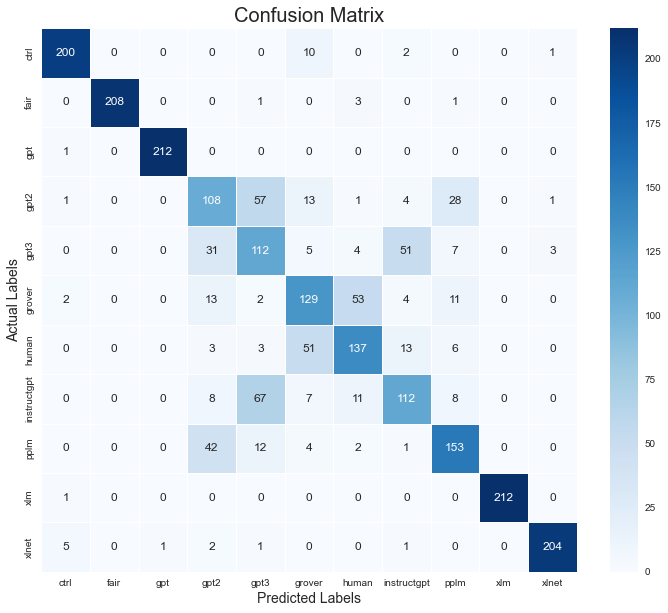

In [166]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.95      0.94      0.95       213
        fair       1.00      0.98      0.99       213
         gpt       1.00      1.00      1.00       213
        gpt2       0.52      0.51      0.51       213
        gpt3       0.44      0.53      0.48       213
      grover       0.59      0.60      0.60       214
       human       0.65      0.64      0.65       213
 instructgpt       0.60      0.53      0.56       213
        pplm       0.71      0.71      0.71       214
         xlm       1.00      1.00      1.00       213
       xlnet       0.98      0.95      0.96       214

    accuracy                           0.76      2346
   macro avg       0.77      0.76      0.76      2346
weighted avg       0.77      0.76      0.76      2346



# Bi-LSTM Architecture

In [66]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
class attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences

        super(attention,self).__init__()

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1))
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1))
        super(attention,self).build(input_shape)


    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        if self.return_sequences:

            return output
        return K.sum(output, axis=1)

In [77]:
from tensorflow import keras
from keras.layers import Bidirectional, Input, TimeDistributed, Flatten, Activation, RepeatVector, Permute, Dense, Lambda
model = keras.Sequential()

    # 2 LSTM layers
model.add(Bidirectional(keras.layers.LSTM(128, input_shape=(train_vector.shape[1], train_vector.shape[2]), return_sequences=True)))
model.add(attention(return_sequences = False))


      # dense layer
model.add(keras.layers.Dense(160, activation='relu'))
model.add(keras.layers.Dropout(0.1))


In [78]:
# Output layer
model.add(tensorflow.keras.layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
y_train.shape, y_test.shape

((9380, 11), (2346, 11))

In [80]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 6, validation_data = (test_vector, y_test))

Epoch 1/6
294/294 [==============================] - 295s 981ms/step - loss: 1.0119 - accuracy: 0.6642 - val_loss: 0.4898 - val_accuracy: 0.8031
Epoch 2/6
294/294 [==============================] - 286s 970ms/step - loss: 0.2372 - accuracy: 0.9191 - val_loss: 0.4731 - val_accuracy: 0.8103
Epoch 3/6
294/294 [==============================] - 283s 960ms/step - loss: 0.0587 - accuracy: 0.9835 - val_loss: 0.5636 - val_accuracy: 0.8048
Epoch 4/6
294/294 [==============================] - 282s 959ms/step - loss: 0.0179 - accuracy: 0.9958 - val_loss: 0.6356 - val_accuracy: 0.7937
Epoch 5/6
294/294 [==============================] - 282s 956ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.6693 - val_accuracy: 0.8014
Epoch 6/6
294/294 [==============================] - 282s 958ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.7057 - val_accuracy: 0.8009


In [81]:
model.save("bilstm.h5")

ValueError: Unknown layer: 'attention'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [65]:
bilstm_loaded = tensorflow.keras.models.load_model("bilstm.h5")

ValueError: Unknown layer: 'attention'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
vocab = v.vocabulary_

In [ ]:
task1_data = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [118]:
task1_data = task1_data.drop("Unnamed: 0",axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [64]:
task1_data

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [65]:
T1 = task1_data["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [66]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [67]:
type(T1)

pandas.core.frame.DataFrame

In [68]:
T2 = task1_data["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [69]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [70]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [71]:
T1 = clean_individual_texts(T1)

In [72]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [73]:
T2 = clean_individual_texts(T2)

In [74]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [75]:
type(T1['Generation'])

pandas.core.series.Series

In [76]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [77]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [78]:
p1_t1 = bilstm_loaded.predict(t1_vector)

134/134 [==============================] - 4s 24ms/step


In [79]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['instructgpt'],
       ['instructgpt'],
       ['human'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [80]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [81]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [82]:
p1_t2 = bilstm_loaded.predict(t2_vector)

134/134 [==============================] - 4s 24ms/step


In [83]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt3'],
       ['human'],
       ['human'],
       ...,
       ['pplm'],
       ['grover'],
       ['pplm']], dtype=object)

In [91]:
print(len(p1_t2_pred))

4264


In [87]:
actual = ch_df['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]


In [89]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      2132
         1.0       0.97      0.73      0.83      2132

    accuracy                           0.85      4264
   macro avg       0.88      0.85      0.85      4264
weighted avg       0.88      0.85      0.85      4264



In [120]:
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        print("same")
    else:
        print("different")
actual = ch_df['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

print(classification_report(actual,predictions))
   
    

In [125]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [127]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [128]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [129]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [130]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [131]:
T1 = clean_individual_texts(T1)

In [132]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67569)


In [133]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [134]:
p2_t1 = bilstm_loaded.predict(t1_vector)

67/67 [==============================] - 4s 35ms/step


In [135]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [125]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [126]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1066
           1       0.83      0.99      0.90      1066

    accuracy                           0.89      2132
   macro avg       0.91      0.89      0.89      2132
weighted avg       0.91      0.89      0.89      2132



In [138]:
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        print("human")
    else:
        print("NLG Method")

NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method
NLG Method

In [139]:
for i in range(len(p2_t1_pred)):
    
    if not p2_t1_pred[i][0] == 'human':
        print(p2_t1_pred[i][0])

ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
pplm
pplm
pplm
pplm
pplm
pplm
pplm
grover
pplm
pplm
pplm
pplm
pplm
pplm
instructgpt
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
grover
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm


In [ ]:
pred_test = model.predict(test_vector)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

# CNN-LSTM Architecture

In [78]:
model = tensorflow.keras.Sequential()

# Add 1D convolutional layer
model.add(tensorflow.keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(train_vector.shape[1], train_vector.shape[2])))

# First LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# Second LSTM layer with Bahdanau Attention
# model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# Combiner
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

In [79]:
# Output layer
model.add(tensorflow.keras.layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [81]:
train_vector.shape, test_vector.shape, y_train.shape, y_test.shape

((9380, 1, 67569), (2346, 1, 67569), (9380, 1, 11), (2346, 1, 11))

In [82]:
history = model.fit(train_vector, y_train, batch_size = 32, epochs = 6, validation_data = (test_vector, y_test))

Epoch 1/6
294/294 [==============================] - 595s 2s/step - loss: 1.3511 - accuracy: 0.4866 - val_loss: 0.6676 - val_accuracy: 0.7238
Epoch 2/6
294/294 [==============================] - 560s 2s/step - loss: 0.5677 - accuracy: 0.7617 - val_loss: 0.5741 - val_accuracy: 0.7639
Epoch 3/6
294/294 [==============================] - 548s 2s/step - loss: 0.2777 - accuracy: 0.8985 - val_loss: 0.6455 - val_accuracy: 0.7796
Epoch 4/6
294/294 [==============================] - 573s 2s/step - loss: 0.1149 - accuracy: 0.9644 - val_loss: 0.9012 - val_accuracy: 0.7720
Epoch 5/6
294/294 [==============================] - 568s 2s/step - loss: 0.0572 - accuracy: 0.9839 - val_loss: 1.0063 - val_accuracy: 0.7779
Epoch 6/6
294/294 [==============================] - 532s 2s/step - loss: 0.0394 - accuracy: 0.9888 - val_loss: 1.1755 - val_accuracy: 0.7681


In [87]:
model.save("CNNLSTM.h5")

In [90]:
vocab = v.vocabulary_

In [91]:
CNNLSTM_loaded = tensorflow.keras.models.load_model('CNNLSTM.h5')

In [58]:
task1_data = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [59]:
task1_data = task1_data.drop("Unnamed: 0",axis = 1)

In [60]:
task1_data

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [61]:
T1 = task1_data["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [62]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [63]:
type(T1)

pandas.core.frame.DataFrame

In [64]:
T2 = task1_data["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [65]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [66]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [67]:
T1 = clean_individual_texts(T1)

In [68]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [69]:
T2 = clean_individual_texts(T2)

In [70]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [71]:
type(T1['Generation'])

pandas.core.series.Series

In [72]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [73]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [74]:
p1_t1 = CNNLSTM_loaded.predict(t1_vector)

134/134 [==============================] - 3s 17ms/step


In [75]:
p1_t1 = np.reshape(p1_t1,(p1_t1.shape[0],p1_t1.shape[2]))

In [76]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['human'],
       ['human'],
       ['instructgpt'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [77]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [78]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [79]:
p1_t2 = CNNLSTM_loaded.predict(t2_vector)

134/134 [==============================] - 2s 17ms/step


In [80]:
p1_t2 = np.reshape(p1_t2,(p1_t2.shape[0],p1_t2.shape[2]))

In [81]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt3'],
       ['human'],
       ['human'],
       ...,
       ['grover'],
       ['grover'],
       ['pplm']], dtype=object)

In [82]:
print(len(p1_t2_pred))

4264


In [83]:
actual = task1_data['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]


In [84]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      2132
         1.0       0.95      0.75      0.84      2132

    accuracy                           0.86      4264
   macro avg       0.87      0.86      0.86      4264
weighted avg       0.87      0.86      0.86      4264



In [85]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [86]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [87]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [88]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [89]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [90]:
T1 = clean_individual_texts(T1)

In [91]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67569)


In [92]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [93]:
p2_t1 = CNNLSTM_loaded.predict(t1_vector)

67/67 [==============================] - 1s 16ms/step


In [94]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [95]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [96]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [97]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1066
           1       0.86      0.97      0.91      1066

    accuracy                           0.91      2132
   macro avg       0.91      0.91      0.91      2132
weighted avg       0.91      0.91      0.91      2132



In [92]:
d2 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\task3_data.csv")

In [93]:
d2 = d2.drop("Unnamed: 0",axis = 1)

In [94]:
d2['label'].value_counts()

ctrl           400
gpt            400
gpt2           400
grover         400
xlm            400
xlnet          400
pplm           400
fair           400
gpt3           400
instructgpt    400
Name: label, dtype: int64

In [95]:
T1 = d2["Generation"].to_frame()

In [96]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [97]:
T1 = clean_individual_texts(T1)

In [98]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4000, 67569)


In [99]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [100]:
p2_t1 = CNNLSTM_loaded.predict(t1_vector)

125/125 [==============================] - 4s 22ms/step


In [101]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [102]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt']], dtype=object)

In [103]:
actual = d2['label'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    predictions.append(p2_t1_pred[i][0])
        
predictions = np.array(predictions)
print(actual)
print(predictions)

['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']
['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'gpt3' 'instructgpt']


In [104]:
print(classification_report(actual, predictions, labels=['ctrl','fair','gpt','gpt2','grover','instructgpt','pplm','xlm','xlnet','gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        ctrl       0.99      0.99      0.99       400
        fair       0.00      0.00      0.00       400
         gpt       1.00      1.00      1.00       400
        gpt2       0.66      0.87      0.75       400
      grover       0.76      0.90      0.82       400
 instructgpt       0.87      0.88      0.87       400
        pplm       0.90      0.96      0.93       400
         xlm       1.00      1.00      1.00       400
       xlnet       1.00      0.98      0.99       400
        gpt3       0.74      0.88      0.81       400
 instructgpt       0.87      0.88      0.87       400

   micro avg       0.87      0.85      0.86      4400
   macro avg       0.80      0.85      0.82      4400
weighted avg       0.80      0.85      0.82      4400



C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Train vs Val. - Loss

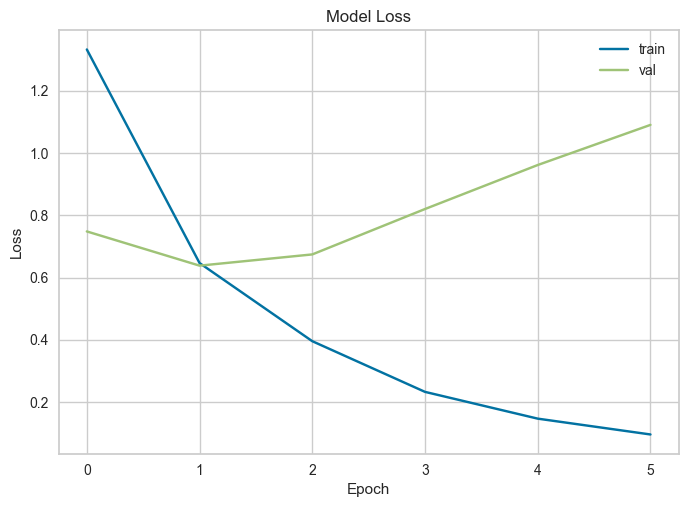

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Train vs Val. - Accuracy

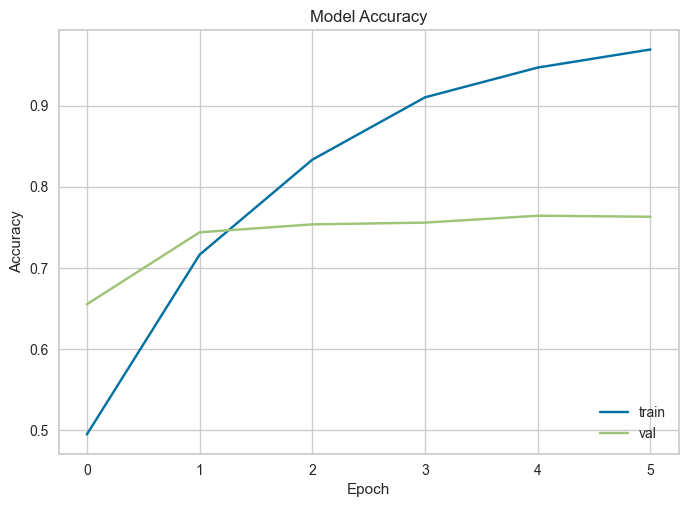

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [93]:
pred_test = model.predict(test_vector)

print(pred_test.shape)

# Reshape pred_test to 2D array
pred_test_2d = np.reshape(pred_test, (pred_test.shape[0]*pred_test.shape[1], pred_test.shape[2]))

# Inverse transform pred_test and y_test
y_pred = encoder.inverse_transform(pred_test_2d)
y_test_2d = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))
y_test = encoder.inverse_transform(y_test_2d)

74/74 [==============================] - 2s 18ms/step
(2346, 1, 11)


In [94]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

Predicted Labels Actual Labels
0       instructgpt          gpt3
1              pplm          pplm
2              gpt3          gpt3
3              gpt2          gpt2
4              pplm          pplm
5              gpt3   instructgpt
6       instructgpt          gpt3
7               xlm           xlm
8               gpt           gpt
9       instructgpt          gpt3
10              gpt           gpt
11             gpt2          pplm
12              xlm           xlm
13             gpt3   instructgpt
14             fair          fair
15              gpt           gpt
16             ctrl          ctrl
17             pplm          pplm
18             gpt3          gpt2
19             ctrl          ctrl
20              gpt           gpt
21              gpt           gpt
22              xlm           xlm
23              gpt           gpt
24             gpt3   instructgpt
25             fair          fair
26             gpt3          gpt3
27              gpt           gpt
28            xlnet         xlnet
29            xlnet         xlnet

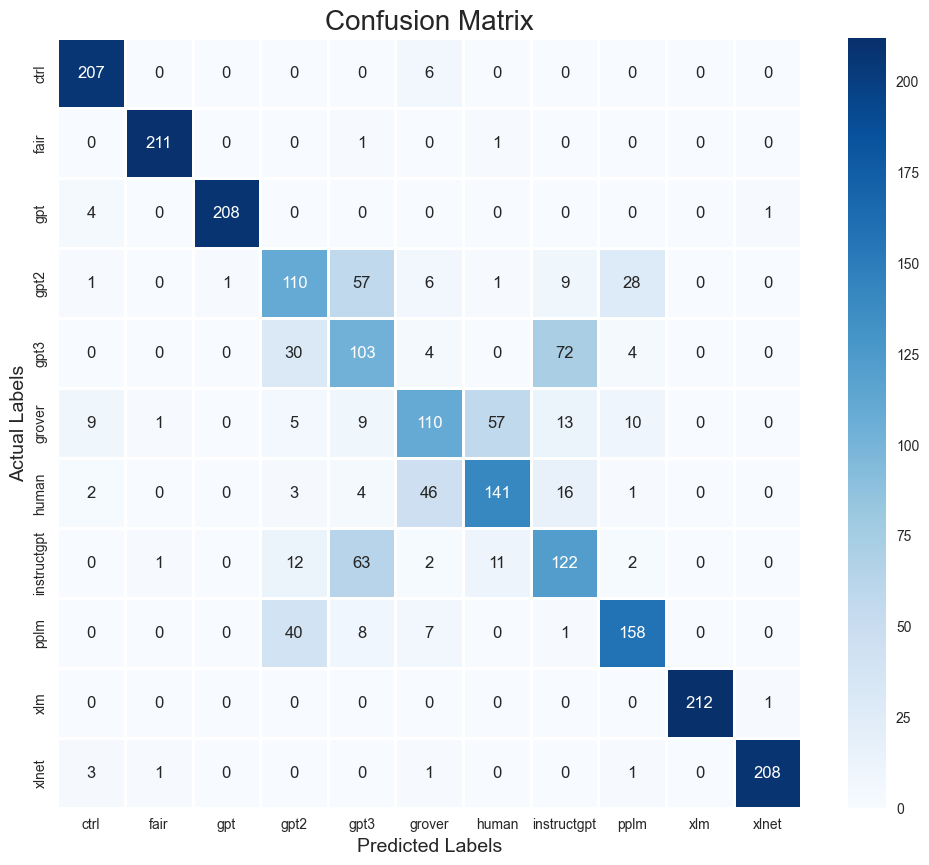

In [95]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.92      0.97      0.94       213
        fair       0.99      0.99      0.99       213
         gpt       1.00      0.98      0.99       213
        gpt2       0.55      0.52      0.53       213
        gpt3       0.42      0.48      0.45       213
      grover       0.60      0.51      0.56       214
       human       0.67      0.66      0.67       213
 instructgpt       0.52      0.57      0.55       213
        pplm       0.77      0.74      0.76       214
         xlm       1.00      1.00      1.00       213
       xlnet       0.99      0.97      0.98       214

    accuracy                           0.76      2346
   macro avg       0.77      0.76      0.76      2346
weighted avg       0.77      0.76      0.76      2346



# Stacked CNN Architecture

In [139]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [140]:
model = tensorflow.keras.Sequential()

# Add first 1D convolutional layer
model.add(tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(train_vector.shape[1], train_vector.shape[2])))

# Add five more 1D convolutional layers with different kernel sizes
model.add(tensorflow.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))

# Add Combiner layers
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(tensorflow.keras.layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [141]:
train_vector.shape, test_vector.shape, y_train.shape, y_test.shape

((9380, 1, 67569), (2346, 1, 67569), (9380, 1, 11), (2346, 1, 11))

In [142]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 10, validation_data = (test_vector, y_test))

Epoch 1/10
294/294 [==============================] - 240s 805ms/step - loss: 1.9044 - accuracy: 0.2194 - val_loss: 1.4562 - val_accuracy: 0.3269
Epoch 2/10
294/294 [==============================] - 254s 863ms/step - loss: 1.2712 - accuracy: 0.4590 - val_loss: 0.9788 - val_accuracy: 0.5968
Epoch 3/10
294/294 [==============================] - 240s 818ms/step - loss: 0.8738 - accuracy: 0.6343 - val_loss: 0.8704 - val_accuracy: 0.6483
Epoch 4/10
294/294 [==============================] - 235s 800ms/step - loss: 0.6111 - accuracy: 0.7522 - val_loss: 0.9018 - val_accuracy: 0.6777
Epoch 5/10
294/294 [==============================] - 242s 824ms/step - loss: 0.4492 - accuracy: 0.8264 - val_loss: 1.0839 - val_accuracy: 0.7029
Epoch 6/10
294/294 [==============================] - 236s 803ms/step - loss: 0.3334 - accuracy: 0.8839 - val_loss: 1.3347 - val_accuracy: 0.6846
Epoch 7/10
294/294 [==============================] - 232s 789ms/step - loss: 0.2808 - accuracy: 0.9149 - val_loss: 1.6641 -

In [143]:
model.save("stackedCNN.h5")

In [105]:
vocab = v.vocabulary_

In [106]:
stackedCNN_loaded = tensorflow.keras.models.load_model('stackedCNN.h5')

In [100]:
task1_data = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [101]:
task1_data = task1_data.drop("Unnamed: 0",axis = 1)

In [102]:
task1_data

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [103]:
T1 = task1_data["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [104]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [105]:
type(T1)

pandas.core.frame.DataFrame

In [106]:
T2 = task1_data["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [107]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [108]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [109]:
T1 = clean_individual_texts(T1)

In [110]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [111]:
T2 = clean_individual_texts(T2)

In [112]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [113]:
type(T1['Generation'])

pandas.core.series.Series

In [114]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [115]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [116]:
p1_t1 = stackedCNN_loaded.predict(t1_vector)

134/134 [==============================] - 2s 10ms/step


In [117]:
p1_t1 = np.reshape(p1_t1,(p1_t1.shape[0],p1_t1.shape[2]))

In [118]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['pplm'],
       ['pplm'],
       ['human'],
       ...,
       ['human'],
       ['pplm'],
       ['pplm']], dtype=object)

In [119]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [120]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [121]:
p1_t2 = stackedCNN_loaded.predict(t2_vector)

134/134 [==============================] - 2s 11ms/step


In [122]:
p1_t2 = np.reshape(p1_t2,(p1_t2.shape[0],p1_t2.shape[2]))

In [123]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt2'],
       ['human'],
       ['human'],
       ...,
       ['pplm'],
       ['pplm'],
       ['pplm']], dtype=object)

In [124]:
print(len(p1_t2_pred))

4264


In [125]:
actual = task1_data['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 1. 1.]


In [126]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81      2132
         1.0       0.89      0.64      0.74      2132

    accuracy                           0.78      4264
   macro avg       0.80      0.78      0.77      4264
weighted avg       0.80      0.78      0.77      4264



In [127]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [128]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [129]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [130]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [131]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [132]:
T1 = clean_individual_texts(T1)

In [133]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67569)


In [134]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [135]:
p2_t1 = stackedCNN_loaded.predict(t1_vector)

67/67 [==============================] - 1s 9ms/step


In [136]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [137]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['human'],
       ['pplm'],
       ['human']], dtype=object)

In [138]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 1 0]


In [139]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1066
           1       0.74      0.95      0.83      1066

    accuracy                           0.81      2132
   macro avg       0.83      0.81      0.80      2132
weighted avg       0.83      0.81      0.80      2132



In [107]:
d2 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\task3_data.csv")

In [108]:
d2 = d2.drop("Unnamed: 0",axis = 1)

In [109]:
d2['label'].value_counts()

ctrl           400
gpt            400
gpt2           400
grover         400
xlm            400
xlnet          400
pplm           400
fair           400
gpt3           400
instructgpt    400
Name: label, dtype: int64

In [110]:
T1 = d2["Generation"].to_frame()

In [111]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [112]:
T1 = clean_individual_texts(T1)

In [113]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4000, 67569)


In [114]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [115]:
p2_t1 = stackedCNN_loaded.predict(t1_vector)

125/125 [==============================] - 2s 14ms/step


In [116]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [117]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt']], dtype=object)

In [118]:
actual = d2['label'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    predictions.append(p2_t1_pred[i][0])
        
predictions = np.array(predictions)
print(actual)
print(predictions)

['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']
['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'gpt3' 'instructgpt']


In [119]:
print(classification_report(actual, predictions, labels=['ctrl','fair','gpt','gpt2','grover','instructgpt','pplm','xlm','xlnet','gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        ctrl       0.99      0.97      0.98       400
        fair       0.00      0.00      0.00       400
         gpt       0.97      0.99      0.98       400
        gpt2       0.72      0.83      0.77       400
      grover       0.95      0.80      0.87       400
 instructgpt       0.91      0.86      0.89       400
        pplm       0.55      0.95      0.70       400
         xlm       0.99      0.99      0.99       400
       xlnet       0.99      0.97      0.98       400
        gpt3       0.81      0.81      0.81       400
 instructgpt       0.91      0.86      0.89       400

   micro avg       0.85      0.82      0.84      4400
   macro avg       0.80      0.82      0.81      4400
weighted avg       0.80      0.82      0.81      4400



C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [59]:
pred_test = stackedCNN_loaded.predict(test_vector)
pred_test = np.reshape(pred_test,(pred_test.shape[0],pred_test.shape[2]))
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

74/74 [==============================] - 1s 9ms/step


In [60]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

Predicted Labels Actual Labels
0              gpt3          gpt3
1              pplm          pplm
2       instructgpt          gpt3
3              pplm          gpt2
4              pplm          pplm
5              gpt3   instructgpt
6       instructgpt          gpt3
7               xlm           xlm
8               gpt           gpt
9              gpt3          gpt3
10              gpt           gpt
11             pplm          pplm
12              xlm           xlm
13             gpt2   instructgpt
14             fair          fair
15              gpt           gpt
16             ctrl          ctrl
17             pplm          pplm
18             gpt3          gpt2
19             ctrl          ctrl
20              gpt           gpt
21              gpt           gpt
22              xlm           xlm
23              gpt           gpt
24      instructgpt   instructgpt
25             fair          fair
26             gpt2          gpt3
27              gpt           gpt
28            xlnet         xlnet
29            xlnet         xlnet

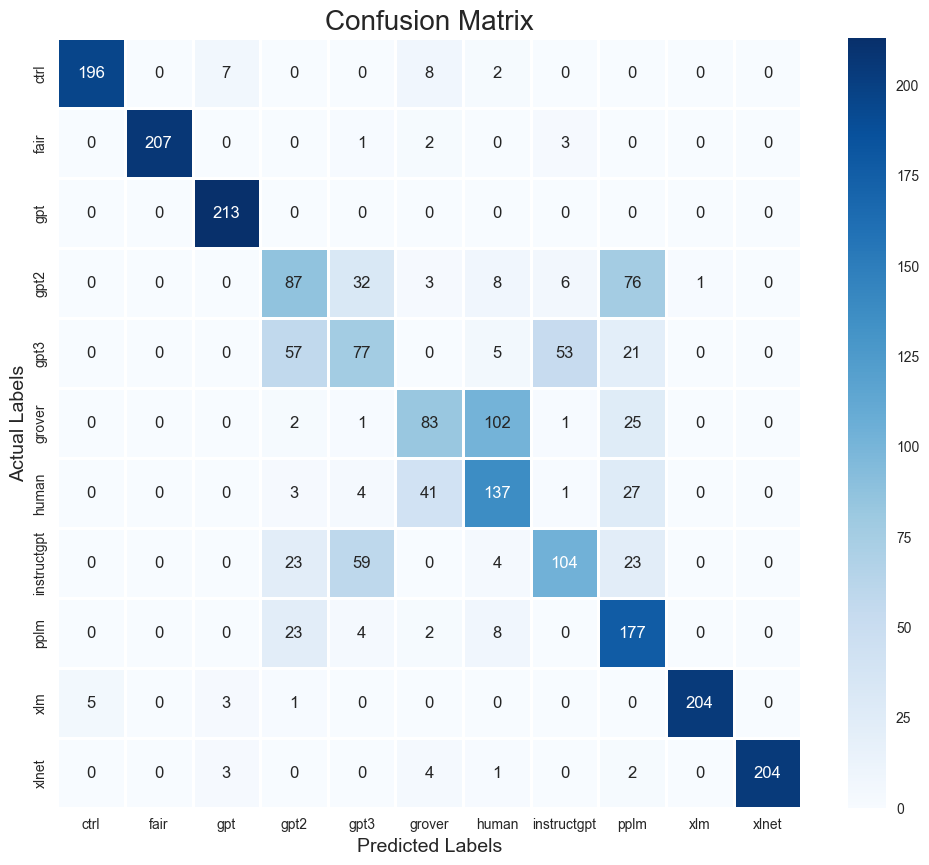

In [61]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.98      0.92      0.95       213
        fair       1.00      0.97      0.99       213
         gpt       0.94      1.00      0.97       213
        gpt2       0.44      0.41      0.43       213
        gpt3       0.43      0.36      0.39       213
      grover       0.58      0.39      0.46       214
       human       0.51      0.64      0.57       213
 instructgpt       0.62      0.49      0.55       213
        pplm       0.50      0.83      0.63       214
         xlm       1.00      0.96      0.98       213
       xlnet       1.00      0.95      0.98       214

    accuracy                           0.72      2346
   macro avg       0.73      0.72      0.72      2346
weighted avg       0.73      0.72      0.72      2346



# RNN GRU 

In [217]:
model = tensorflow.keras.Sequential()

# First LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(train_vector.shape[1], train_vector.shape[2]), activation='tanh', return_sequences=True))

# Second LSTM layer with Bahdanau Attention
# model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# GRU layer
model.add(tensorflow.keras.layers.GRU(128, activation='tanh', return_sequences=True))

# Combiner
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

In [218]:
# Output layer
model.add(tensorflow.keras.layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [219]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [220]:
train_vector.shape, test_vector.shape, y_train.shape, y_test.shape

((9380, 1, 67569), (2346, 1, 67569), (9380, 1, 11), (2346, 1, 11))

In [221]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 7, validation_data = (test_vector, y_test))

Epoch 1/7
294/294 [==============================] - 171s 535ms/step - loss: 1.2664 - accuracy: 0.5146 - val_loss: 0.6581 - val_accuracy: 0.6982
Epoch 2/7
294/294 [==============================] - 150s 511ms/step - loss: 0.5682 - accuracy: 0.7538 - val_loss: 0.6044 - val_accuracy: 0.7511
Epoch 3/7
294/294 [==============================] - 148s 503ms/step - loss: 0.3010 - accuracy: 0.8888 - val_loss: 0.6655 - val_accuracy: 0.7604
Epoch 4/7
294/294 [==============================] - 149s 506ms/step - loss: 0.1628 - accuracy: 0.9480 - val_loss: 0.7884 - val_accuracy: 0.7634
Epoch 5/7
294/294 [==============================] - 148s 503ms/step - loss: 0.0889 - accuracy: 0.9722 - val_loss: 0.9958 - val_accuracy: 0.7570
Epoch 6/7
294/294 [==============================] - 148s 502ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 1.1905 - val_accuracy: 0.7596
Epoch 7/7
294/294 [==============================] - 145s 494ms/step - loss: 0.0411 - accuracy: 0.9886 - val_loss: 1.2630 - val_ac

In [222]:
model.save("RNNGRU.h5")

In [120]:
vocab = v.vocabulary_

In [121]:
RNNGRU_loaded = tensorflow.keras.models.load_model('RNNGRU.h5')

In [57]:
task1_data = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [58]:
task1_data = task1_data.drop("Unnamed: 0",axis = 1)

In [59]:
task1_data

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [60]:
T1 = task1_data["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [61]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [62]:
type(T1)

pandas.core.frame.DataFrame

In [63]:
T2 = task1_data["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [64]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [65]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [66]:
T1 = clean_individual_texts(T1)

In [67]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [68]:
T2 = clean_individual_texts(T2)

In [69]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [70]:
type(T1['Generation'])

pandas.core.series.Series

In [71]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [72]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [73]:
p1_t1 = RNNGRU_loaded.predict(t1_vector)

134/134 [==============================] - 7s 26ms/step


In [74]:
p1_t1 = np.reshape(p1_t1,(p1_t1.shape[0],p1_t1.shape[2]))

In [75]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['gpt3'],
       ['human'],
       ['human'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [76]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67569)


In [77]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [78]:
p1_t2 = RNNGRU_loaded.predict(t2_vector)

134/134 [==============================] - 4s 28ms/step


In [79]:
p1_t2 = np.reshape(p1_t2,(p1_t2.shape[0],p1_t2.shape[2]))

In [80]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt2'],
       ['human'],
       ['human'],
       ...,
       ['grover'],
       ['grover'],
       ['gpt2']], dtype=object)

In [81]:
print(len(p1_t2_pred))

4264


In [82]:
actual = task1_data['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [83]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85      2132
         1.0       0.95      0.69      0.80      2132

    accuracy                           0.83      4264
   macro avg       0.86      0.83      0.83      4264
weighted avg       0.86      0.83      0.83      4264



In [84]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [85]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [86]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [87]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [88]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [89]:
T1 = clean_individual_texts(T1)

In [90]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67569)


In [91]:

t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [92]:
p2_t1 = RNNGRU_loaded.predict(t1_vector)

67/67 [==============================] - 2s 27ms/step


In [93]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [94]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['grover'],
       ['human'],
       ['human']], dtype=object)

In [95]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 1 0 0]


In [96]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1066
           1       0.78      0.99      0.87      1066

    accuracy                           0.86      2132
   macro avg       0.89      0.86      0.86      2132
weighted avg       0.89      0.86      0.86      2132



In [122]:
d2 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\task3_data.csv")

In [123]:
d2 = d2.drop("Unnamed: 0",axis = 1)

In [124]:
d2['label'].value_counts()

ctrl           400
gpt            400
gpt2           400
grover         400
xlm            400
xlnet          400
pplm           400
fair           400
gpt3           400
instructgpt    400
Name: label, dtype: int64

In [125]:
T1 = d2["Generation"].to_frame()

In [126]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [127]:
T1 = clean_individual_texts(T1)

In [128]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4000, 67569)


In [129]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [130]:
p2_t1 = RNNGRU_loaded.predict(t1_vector)

125/125 [==============================] - 10s 44ms/step


In [131]:
p2_t1 = np.reshape(p2_t1,(p2_t1.shape[0],p2_t1.shape[2]))

In [132]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt']], dtype=object)

In [133]:
actual = d2['label'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    predictions.append(p2_t1_pred[i][0])
        
predictions = np.array(predictions)
print(actual)
print(predictions)

['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']
['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'gpt3' 'instructgpt']


In [134]:
print(classification_report(actual, predictions, labels=['ctrl','fair','gpt','gpt2','grover','instructgpt','pplm','xlm','xlnet','gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        ctrl       0.99      0.99      0.99       400
        fair       0.00      0.00      0.00       400
         gpt       0.99      1.00      1.00       400
        gpt2       0.66      0.90      0.76       400
      grover       0.76      0.93      0.83       400
 instructgpt       0.93      0.85      0.89       400
        pplm       0.82      0.95      0.88       400
         xlm       1.00      1.00      1.00       400
       xlnet       1.00      0.98      0.99       400
        gpt3       0.71      0.89      0.79       400
 instructgpt       0.93      0.85      0.89       400

   micro avg       0.86      0.85      0.86      4400
   macro avg       0.80      0.85      0.82      4400
weighted avg       0.80      0.85      0.82      4400



C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [85]:
pred_test = RNNGRU_loaded.predict(test_vector)
pred_test = np.reshape(pred_test,(pred_test.shape[0],pred_test.shape[2]))
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

74/74 [==============================] - 3s 25ms/step


In [86]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

Predicted Labels Actual Labels
0              gpt3          gpt3
1              gpt2          pplm
2       instructgpt          gpt3
3              pplm          gpt2
4              pplm          pplm
5              gpt3   instructgpt
6       instructgpt          gpt3
7               xlm           xlm
8               gpt           gpt
9             human          gpt3
10              gpt           gpt
11             gpt2          pplm
12              xlm           xlm
13             gpt3   instructgpt
14             fair          fair
15              gpt           gpt
16             ctrl          ctrl
17             pplm          pplm
18             gpt3          gpt2
19             ctrl          ctrl
20              gpt           gpt
21              gpt           gpt
22              xlm           xlm
23              gpt           gpt
24             gpt3   instructgpt
25             fair          fair
26      instructgpt          gpt3
27              gpt           gpt
28            xlnet         xlnet
29            xlnet         xlnet

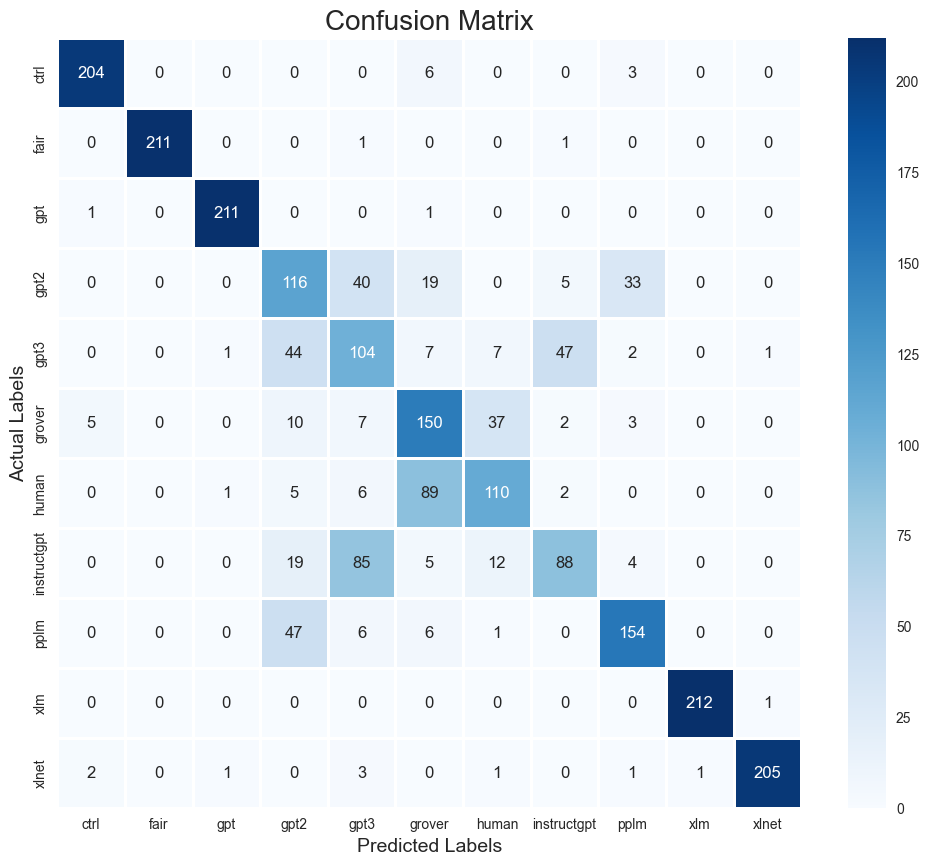

In [87]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.96      0.96      0.96       213
        fair       1.00      0.99      1.00       213
         gpt       0.99      0.99      0.99       213
        gpt2       0.48      0.54      0.51       213
        gpt3       0.41      0.49      0.45       213
      grover       0.53      0.70      0.60       214
       human       0.65      0.52      0.58       213
 instructgpt       0.61      0.41      0.49       213
        pplm       0.77      0.72      0.74       214
         xlm       1.00      1.00      1.00       213
       xlnet       0.99      0.96      0.97       214

    accuracy                           0.75      2346
   macro avg       0.76      0.75      0.75      2346
weighted avg       0.76      0.75      0.75      2346



# Parallel CNN

In [53]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, concatenate, Flatten, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.models import Model

# Define input shape
input_shape = (1, 67670)

# Define input layer
inputs = Input(shape=input_shape)

# Define four parallel 1D convolutional layers with different kernel sizes
conv1 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)
conv2 = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(inputs)
conv3 = Conv1D(filters=32, kernel_size=7, padding='same', activation='relu')(inputs)
conv4 = Conv1D(filters=32, kernel_size=9, padding='same', activation='relu')(inputs)

# Apply global max pooling to each convolutional layer
pool1 = GlobalMaxPooling1D()(conv1)
pool2 = GlobalMaxPooling1D()(conv2)
pool3 = GlobalMaxPooling1D()(conv3)
pool4 = GlobalMaxPooling1D()(conv4)

# Concatenate the output of the four pooling layers
merged = concatenate([pool1, pool2, pool3, pool4])

# Add a dense layer with dropout
dense1 = Dense(64, activation='relu')(merged)
drop1 = Dropout(0.2)(dense1)

# Output layer
outputs = Dense(11, activation='softmax')(drop1)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [54]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 7, validation_data = (test_vector, y_test))

Epoch 1/7
294/294 [==============================] - 1157s 4s/step - loss: 1.1643 - accuracy: 0.6285 - val_loss: 0.5877 - val_accuracy: 0.7988
Epoch 2/7
294/294 [==============================] - 1170s 4s/step - loss: 0.3451 - accuracy: 0.8878 - val_loss: 0.4744 - val_accuracy: 0.8146
Epoch 3/7
294/294 [==============================] - 1133s 4s/step - loss: 0.1084 - accuracy: 0.9738 - val_loss: 0.5190 - val_accuracy: 0.8116
Epoch 4/7
294/294 [==============================] - 1172s 4s/step - loss: 0.0370 - accuracy: 0.9931 - val_loss: 0.5853 - val_accuracy: 0.8035
Epoch 5/7
 27/294 [=>............................] - ETA: 17:59 - loss: 0.0161 - accuracy: 0.9988

KeyboardInterrupt: 

In [55]:
model.save('ParallelCNN.h5')

In [150]:
vocab = v.vocabulary_

In [151]:
ParallelCNN_loaded = tensorflow.keras.models.load_model('ParallelCNN.h5')

In [57]:
task1_data = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p1.csv")

In [58]:
task1_data = task1_data.drop("Unnamed: 0",axis = 1)

In [59]:
task1_data

T1  \
0     Barbra Streisand, James Corden and More on The...   
1     Transcripts return to transcripts main page cn...   
2     China Spins Tale That the U.S. Army Started th...   
3     History's deadliest air raid happened in Tokyo...   
4     Surprising factors that may keep you thin cnn ...   
...                                                 ...   
4259  One man lost his life savings in a SIM hack. H...   
4260  Canadian PM Trudeau's wife tests positive for ...   
4261  How ancient Egyptian cosmetics influenced our ...   
4262  Student Stabbed At Glen Burnie High School Dur...   
4263  Diplomat at the UN tests positive for coronavi...   

                                                     T2  class  
0     Latest Headlines on CNN Business the great shu...    1.0  
1     China wants to take a victory lap over its han...    1.0  
2     Coronavirus disinformation creates challenges ...    1.0  
3     China coronavirus: Eating wild animals made il...    1.0  
4     China's economy could shrink for the first tim...    1.0  
...                                                 ...    ...  
4259  trump s america cartoon views from around the ...    0.0  
4260  china s economy could shrink for the first tim...    0.0  
4261  a dark matter hurricane is headed our way and ...    0.0  
4262  we are failing the elephants the former head o...    0.0  
4263  opinion they unk unk ve contained the coronavi...    0.0  

[4264 rows x 3 columns]

In [60]:
T1 = task1_data["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [61]:
T1

Generation
0     Barbra Streisand, James Corden and More on The...
1     Transcripts return to transcripts main page cn...
2     China Spins Tale That the U.S. Army Started th...
3     History's deadliest air raid happened in Tokyo...
4     Surprising factors that may keep you thin cnn ...
...                                                 ...
4259  One man lost his life savings in a SIM hack. H...
4260  Canadian PM Trudeau's wife tests positive for ...
4261  How ancient Egyptian cosmetics influenced our ...
4262  Student Stabbed At Glen Burnie High School Dur...
4263  Diplomat at the UN tests positive for coronavi...

[4264 rows x 1 columns]

In [62]:
type(T1)

pandas.core.frame.DataFrame

In [63]:
T2 = task1_data["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [64]:
T2

Generation
0     Latest Headlines on CNN Business the great shu...
1     China wants to take a victory lap over its han...
2     Coronavirus disinformation creates challenges ...
3     China coronavirus: Eating wild animals made il...
4     China's economy could shrink for the first tim...
...                                                 ...
4259  trump s america cartoon views from around the ...
4260  china s economy could shrink for the first tim...
4261  a dark matter hurricane is headed our way and ...
4262  we are failing the elephants the former head o...
4263  opinion they unk unk ve contained the coronavi...

[4264 rows x 1 columns]

In [65]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [66]:
T1 = clean_individual_texts(T1)

In [67]:
T1

Generation
0     barbra streisand jame corden favorit sondheim ...
1     transcript return transcript main page cnn tra...
2     china spin tale us armi start coronaviru epide...
3     histori deadliest air raid happen tokyo world ...
4     surpris factor may keep thin cnn ever wonder p...
...                                                 ...
4259  one man lost life save sim hack here tri prote...
4260  canadian pm trudeau wife test posit coronaviru...
4261  ancient egyptian cosmet influenc beauti ritual...
4262  student stab glen burni high school fight two ...
4263  diplomat un test posit coronaviru cnn staffer ...

[4264 rows x 1 columns]

In [68]:
T2 = clean_individual_texts(T2)

In [69]:
T2

Generation
0     latest headlin cnn busi great shutdown newsroo...
1     china want take victori lap handl coronaviru o...
2     coronaviru disinform creat challeng china gove...
3     china coronaviru eat wild anim made illeg end ...
4     china economi could shrink first time decad co...
...                                                 ...
4259  trump america cartoon view around world pictur...
4260  china economi could shrink first time decad co...
4261  dark matter hurrican head way bring us violent...
4262  fail eleph former head nation public prosecut ...
4263  opinion unk unk contain coronaviru unk unk als...

[4264 rows x 1 columns]

In [70]:
type(T1['Generation'])

pandas.core.series.Series

In [71]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67670)


In [72]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [73]:
p1_t1 = ParallelCNN_loaded.predict(t1_vector)

134/134 [==============================] - 5s 28ms/step


In [74]:
p1_t1_pred = encoder.inverse_transform(p1_t1)
p1_t1_pred

array([['human'],
       ['human'],
       ['human'],
       ...,
       ['human'],
       ['instructgpt'],
       ['human']], dtype=object)

In [75]:
v2 = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v2.fit_transform(t2_corpus)
print(t2_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4264, 67670)


In [76]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [77]:
p1_t2 = ParallelCNN_loaded.predict(t2_vector)

134/134 [==============================] - 4s 29ms/step


In [78]:
p1_t2_pred = encoder.inverse_transform(p1_t2)
p1_t2_pred

array([['gpt2'],
       ['human'],
       ['human'],
       ...,
       ['grover'],
       ['pplm'],
       ['pplm']], dtype=object)

In [79]:
print(len(p1_t2_pred))

4264


In [80]:
actual = task1_data['class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)
print(actual)
print(predictions)
   
    

[1. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [81]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      2132
         1.0       0.97      0.81      0.89      2132

    accuracy                           0.90      4264
   macro avg       0.91      0.90      0.90      4264
weighted avg       0.91      0.90      0.90      4264



In [82]:
d1 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\balanced_p2.csv")

In [83]:
d1 = d1.drop("Unnamed: 0",axis = 1)

In [84]:
d1

text  class
0     bbc london the british government is expected ...      1
1     workers fight for rights at ground zero for us...      1
2     entrepreneurship and the arts the museum of mo...      1
3     in coronavirus crisis tom hanks is more of a r...      1
4     zunar and fahmi reza the cartoonists who helpe...      1
...                                                 ...    ...
2127  How much of your body is your own? this story ...      0
2128  How do you keep a space station clean? by 1998...      0
2129  The city where you pay a year's rent up front ...      0
2130  The BBC News app gives you the best of BBC New...      0
2131  Learn how the BBC is working to strengthen tru...      0

[2132 rows x 2 columns]

In [85]:
T1 = d1["text"].to_frame().rename(columns={'text': 'Generation'})

In [86]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [87]:
T1 = clean_individual_texts(T1)

In [88]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(2132, 67670)


In [89]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [90]:
p2_t1 = ParallelCNN_loaded.predict(t1_vector)

67/67 [==============================] - 2s 31ms/step


In [91]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['human'],
       ['human'],
       ['human']], dtype=object)

In [92]:
actual = d1['class'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        predictions.append(0)
    else:
        predictions.append(1)
        
predictions = np.array(predictions)
print(actual)
print(predictions)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [93]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1066
           1       0.89      0.99      0.94      1066

    accuracy                           0.93      2132
   macro avg       0.94      0.93      0.93      2132
weighted avg       0.94      0.93      0.93      2132



In [ ]:
for i in range(len(p2_t1_pred)):
    
    if p2_t1_pred[i][0] == 'human':
        print("human")
    else:
        print("NLG Method")

In [98]:
for i in range(len(p2_t1_pred)):
    
    if not p2_t1_pred[i][0] == 'human':
        print(p2_t1_pred[i][0])

ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
xlnet
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
ctrl
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pplm
pp

In [130]:
pred_test = ParallelCNN_loaded .predict(test_vector)

y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

74/74 [==============================] - 2s 26ms/step


In [131]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

Predicted Labels Actual Labels
0              fair          fair
1              gpt3          gpt3
2              fair          fair
3              pplm          pplm
4              gpt3          gpt3
5              ctrl          ctrl
6              fair          fair
7             human         human
8               xlm           xlm
9              fair          fair
10              xlm           xlm
11             gpt3          gpt3
12            human         human
13             ctrl          ctrl
14              gpt           gpt
15              xlm           xlm
16            xlnet         xlnet
17             gpt3          gpt3
18             pplm          pplm
19            xlnet         xlnet
20              xlm           xlm
21              xlm           xlm
22            human         human
23              xlm           xlm
24             ctrl          ctrl
25              gpt           gpt
26             fair          fair
27              xlm           xlm
28           grover        grover
29             gpt3        grover

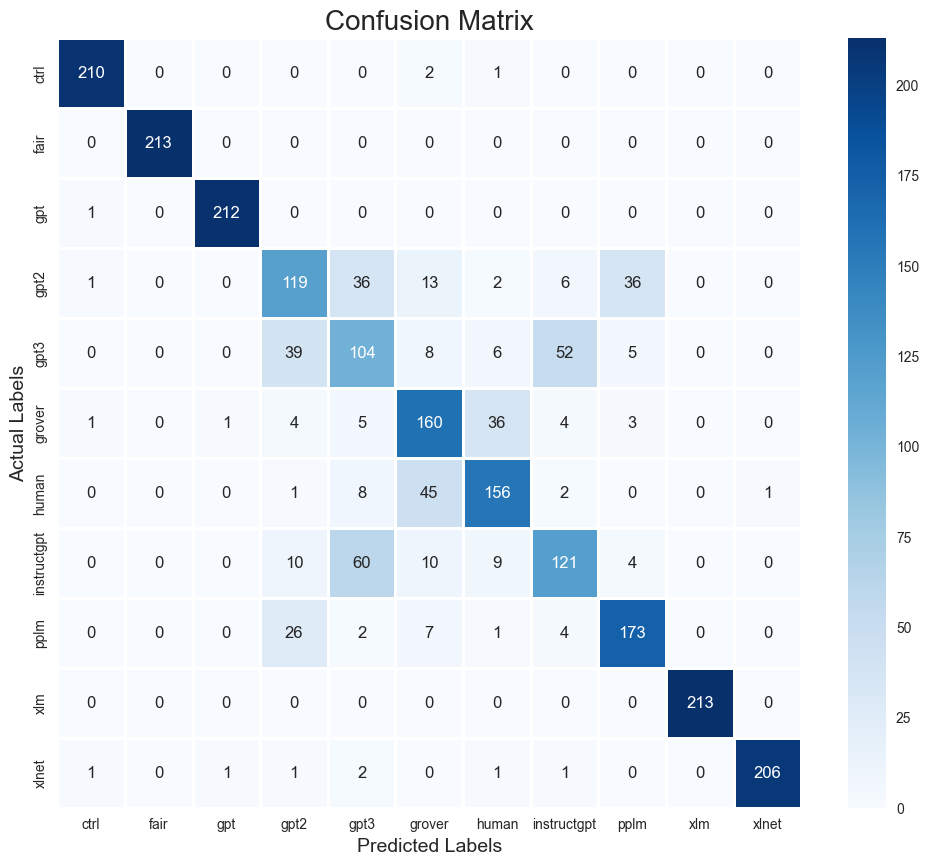

In [132]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.98      0.99      0.98       213
        fair       1.00      1.00      1.00       213
         gpt       0.99      1.00      0.99       213
        gpt2       0.59      0.56      0.58       213
        gpt3       0.48      0.49      0.48       214
      grover       0.65      0.75      0.70       214
       human       0.74      0.73      0.73       213
 instructgpt       0.64      0.57      0.60       214
        pplm       0.78      0.81      0.80       213
         xlm       1.00      1.00      1.00       213
       xlnet       1.00      0.97      0.98       213

    accuracy                           0.80      2346
   macro avg       0.80      0.80      0.80      2346
weighted avg       0.80      0.80      0.80      2346



In [152]:
d2 = pd.read_csv(r"C:\Users\shiny\Downloads\Authorship-Attribution-for-Neural-Text-Generation-master (1)\Authorship-Attribution-for-Neural-Text-Generation-master\data\task3_data.csv")

In [153]:
d2 = d2.drop("Unnamed: 0",axis = 1)

In [154]:
d2['label'].value_counts()

ctrl           400
gpt            400
gpt2           400
grover         400
xlm            400
xlnet          400
pplm           400
fair           400
gpt3           400
instructgpt    400
Name: label, dtype: int64

In [155]:
T1 = d2["Generation"].to_frame()

In [156]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [157]:
T1 = clean_individual_texts(T1)

In [158]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(4000, 67670)


In [159]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [160]:
p2_t1 = ParallelCNN_loaded .predict(t1_vector)

125/125 [==============================] - 8s 43ms/step


In [161]:
p2_t1_pred = encoder.inverse_transform(p2_t1)
p2_t1_pred

array([['ctrl'],
       ['ctrl'],
       ['ctrl'],
       ...,
       ['instructgpt'],
       ['instructgpt'],
       ['instructgpt']], dtype=object)

In [162]:
actual = d2['label'].to_numpy()
predictions = []
for i in range(len(p2_t1_pred)):
    predictions.append(p2_t1_pred[i][0])
        
predictions = np.array(predictions)
print(actual)
print(predictions)

['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']
['ctrl' 'ctrl' 'ctrl' ... 'instructgpt' 'instructgpt' 'instructgpt']


In [163]:
print(classification_report(actual, predictions, labels=['ctrl','fair','gpt','gpt2','grover','instructgpt','pplm','xlm','xlnet','gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        ctrl       0.98      1.00      0.99       400
        fair       0.00      0.00      0.00       400
         gpt       1.00      1.00      1.00       400
        gpt2       0.64      0.90      0.75       400
      grover       0.83      0.93      0.88       400
 instructgpt       0.88      0.90      0.89       400
        pplm       0.84      0.97      0.90       400
         xlm       1.00      1.00      1.00       400
       xlnet       1.00      0.98      0.99       400
        gpt3       0.79      0.89      0.84       400
 instructgpt       0.88      0.90      0.89       400

   micro avg       0.87      0.86      0.87      4400
   macro avg       0.80      0.86      0.83      4400
weighted avg       0.80      0.86      0.83      4400



C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,